## Import

In [1]:
from __future__ import absolute_import
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import os
import json
import numpy as np
from scipy import stats
from numpy import array
from tqdm import tqdm
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
data_processed_path = r"C:\Users\URHU\Documents\delirium_data"
data_processed_path_mimic = r"C:\Users\URHU\Documents\data_temp\MIMIC"
data_processed_path_eicu  = r"C:\Users\URHU\Documents\data_temp\eICU"

## loading

In [2]:
eicu_pos = pd.read_csv(os.path.join(data_processed_path_eicu,"pos_eicu_imputed_24los.csv"))
eicu_neg = pd.read_csv(os.path.join(data_processed_path_eicu,"neg_eicu_imputed_24los.csv"))
mimic_pos = pd.read_csv(os.path.join(data_processed_path_mimic,"pos_mimic_imputed_24los.csv"))
mimic_neg = pd.read_csv(os.path.join(data_processed_path_mimic,"neg_mimic_imputed_24los.csv"))

In [3]:
mimic_df = pd.concat([mimic_pos, mimic_neg],axis=0)
display(mimic_df.head())
print("MIMIC dataset shape:", mimic_df.shape)
print("MIMIC unique stay", mimic_df['patientunitstayid'].nunique())
#print count of itemoffest in each unique patientunitstayid
display(mimic_df.describe())

,patientunitstayid,itemoffset,gender,age,height,weight,heart rate,o2 saturation,glucose,temperature,sodium,bun,wbc,direct bilirubin,hemoglobin,platelets,potassium,chloride,bicarbonate,creatinine,alt,ast,alkaline phosphate,CAM,los,labelrec,labelpt,LOS
0,200034,1,1,54,169.350688,45.0,102.0,100.0,114.0,33.888889,146.0,9.0,5.0,NaN,9.6,239.0,3.6,112.0,24.0,0.5,NaN,NaN,NaN,1.0,77.208,0.0,1.0,77.208
1,200034,2,1,54,169.350688,45.0,102.0,100.0,105.0,33.888889,147.0,9.0,5.0,NaN,9.7,239.0,3.5,112.0,24.0,0.5,NaN,NaN,NaN,1.0,77.208,0.0,1.0,77.208
2,200034,4,1,54,169.350688,45.0,102.0,100.0,94.0,33.888889,144.0,9.0,5.0,NaN,8.6,239.0,3.1,111.0,24.0,0.5,NaN,NaN,NaN,1.0,77.208,0.0,1.0,77.208
3,200034,5,1,54,169.350688,45.0,103.0,100.0,106.0,34.444444,149.0,9.0,11.0,NaN,11.5,239.0,4.4,116.0,24.0,0.5,NaN,NaN,NaN,1.0,77.208,0.0,1.0,77.208
4,200034,6,1,54,169.350688,45.0,78.0,100.0,106.0,35.666667,149.0,9.0,11.0,NaN,11.5,239.0,4.4,116.0,24.0,0.5,NaN,NaN,NaN,1.0,77.208,0.0,1.0,77.208


MIMIC dataset shape: (595051, 28)
MIMIC unique stay 6220


,patientunitstayid,itemoffset,gender,age,height,weight,heart rate,o2 saturation,glucose,temperature,sodium,bun,wbc,direct bilirubin,hemoglobin,platelets,potassium,chloride,bicarbonate,creatinine,alt,ast,alkaline phosphate,CAM,los,labelrec,labelpt,LOS
count,595051.000000,595051.000000,595051.000000,595051.000000,595051.000000,595051.000000,595051.000000,5.950510e+05,595051.000000,595051.000000,595051.000000,595051.000000,595051.000000,96861.000000,595051.000000,595051.000000,595051.000000,595051.000000,595051.000000,595051.000000,401386.000000,401120.000000,397685.000000,595051.000000,595051.000000,595051.000000,595051.000000,595051.000000
mean,249895.834604,122.668966,1.564599,63.754671,169.364435,82.581333,86.549991,1.091294e+02,154.800781,36.851968,138.904619,62.368634,11.753776,4.639429,18.562566,224.748752,4.042570,104.187422,25.383377,1.506916,111.642591,138.914341,118.173192,0.389000,246.456475,0.008655,0.389000,246.456475
std,28877.154129,169.237870,0.495810,15.677044,11.214585,26.791335,17.785092,8.346477e+03,3723.371464,6.154063,4.942954,5650.455022,11.660431,6.263793,2898.689349,137.644084,0.551689,6.363817,5.051294,1.477850,527.869084,695.928373,116.541906,0.487524,266.775967,0.092627,0.487524,266.775967
min,200001.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-17.777778,97.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.800000,3.400000,5.000000,0.000000,0.000000,3.000000,6.000000,0.000000,24.002400,0.000000,0.000000,24.002400
25%,225042.000000,25.000000,1.000000,54.000000,168.000000,66.300000,74.000000,9.500000e+01,107.000000,36.444444,136.000000,14.000000,7.200000,0.900000,8.900000,131.000000,3.700000,100.000000,22.000000,0.700000,16.000000,24.000000,60.000000,0.000000,72.031200,0.000000,0.000000,72.031200
50%,250142.000000,62.000000,2.000000,66.000000,169.350688,78.800000,85.000000,9.700000e+01,128.000000,36.833333,139.000000,23.000000,10.000000,2.500000,10.000000,198.000000,4.000000,104.000000,25.000000,1.000000,28.000000,39.000000,86.000000,0.000000,154.356000,0.000000,0.000000,154.356000
75%,274596.000000,152.000000,2.000000,76.000000,173.000000,94.700000,98.000000,9.900000e+01,158.000000,37.277778,142.000000,39.000000,13.800000,5.500000,11.200000,287.000000,4.300000,108.000000,28.000000,1.700000,58.000000,76.000000,132.000000,1.000000,333.060000,0.000000,1.000000,333.060000
max,299979.000000,2082.000000,2.000000,89.000000,445.000000,710.400000,950.000000,6.363333e+06,999999.000000,2686.305556,180.000000,999999.000000,950.000000,37.000000,999998.980000,1783.000000,26.500000,144.000000,50.000000,33.200000,25460.000000,34040.000000,2355.000000,1.000000,2084.361600,1.000000,1.000000,2084.361600


In [4]:
eicu_df = pd.concat([eicu_pos, eicu_neg],axis=0)
display(eicu_df.head())
print("eICU dataset shape:", eicu_df.shape)
print("eICU unique stay", eicu_df['patientunitstayid'].nunique())
print(f"unique patientunitstayid in mimic: {mimic_df.patientunitstayid.nunique()}")
print("Unique labelrec in eicu:", eicu_df['labelrec'].unique())
display(eicu_df.describe() )

,patientunitstayid,uniquepid,itemoffset,gender,age,Height,Weight,Heart Rate,O2 Saturation,glucose,Temperature (C),sodium,BUN,WBC x 1000,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
0,1055486,009-4923,1,1,63,162.6,102.6,88.0,97.0,180.0,36.5,130.0,83.0,5.2,10.1,256.0,5.4,102.0,19.0,5.69,1.0,NaN,1.0,143.1312
1,1055486,009-4923,2,1,63,162.6,102.6,88.0,97.0,180.0,36.5,130.0,83.0,5.2,10.1,256.0,5.4,102.0,19.0,5.69,1.0,NaN,1.0,143.1312
2,1055486,009-4923,3,1,63,162.6,102.6,88.0,97.4,198.0,36.5,130.0,83.0,5.2,10.1,256.0,5.4,102.0,19.0,5.69,1.0,NaN,1.0,143.1312
3,1055486,009-4923,4,1,63,162.6,102.6,88.0,99.0,198.0,36.5,130.0,83.0,5.2,10.1,256.0,5.4,102.0,19.0,5.69,1.0,NaN,1.0,143.1312
4,1055486,009-4923,5,1,63,162.6,102.6,80.0,99.0,198.0,36.5,130.0,83.0,5.2,10.1,256.0,5.4,102.0,19.0,5.69,1.0,NaN,1.0,143.1312


eICU dataset shape: (1827303, 24)
eICU unique stay 16546
unique patientunitstayid in mimic: 6220
Unique labelrec in eicu: [nan  0.  1.]


,patientunitstayid,itemoffset,gender,age,Height,Weight,Heart Rate,O2 Saturation,glucose,Temperature (C),sodium,BUN,WBC x 1000,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
count,1.827303e+06,1.827303e+06,1.827303e+06,1.827303e+06,1.827303e+06,1.827303e+06,1.790796e+06,1.789465e+06,1.789852e+06,1.825574e+06,1.757459e+06,1.750640e+06,1.729967e+06,1.741332e+06,1.713209e+06,1.759165e+06,1.752507e+06,1.720182e+06,1.749929e+06,1.827303e+06,117257.000000,1.827303e+06,1.827303e+06
mean,1.566428e+06,1.424213e+02,1.541285e+00,6.269972e+01,1.692730e+02,8.575742e+01,8.596911e+01,9.663006e+01,1.406020e+02,3.745417e+01,1.392777e+02,2.926606e+01,1.205794e+01,1.026523e+01,2.196289e+02,4.029867e+00,1.035516e+02,2.560224e+01,1.509082e+00,3.223456e-01,0.136998,3.223456e-01,2.171660e+02
std,7.757532e+05,2.577831e+02,4.983971e-01,1.552356e+01,1.401060e+01,2.922306e+01,1.808679e+01,3.856637e+00,6.001369e+01,1.398956e+02,5.422226e+00,2.289969e+01,7.617887e+00,2.236833e+00,1.219613e+02,6.010887e-01,6.847884e+00,5.174866e+00,1.646395e+00,4.673746e-01,0.343847,4.673746e-01,4.279942e+02
min,2.421540e+05,1.000000e+00,0.000000e+00,1.800000e+01,9.400000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.550000e+01,9.800000e+01,1.000000e+00,0.000000e+00,1.600000e+00,1.000000e+00,8.000000e-01,6.100000e+01,2.000000e+00,9.000000e-02,0.000000e+00,0.000000,0.000000e+00,2.400000e+01
25%,9.800590e+05,3.100000e+01,1.000000e+00,5.300000e+01,1.626000e+02,6.750000e+01,7.300000e+01,9.500000e+01,1.050000e+02,3.660000e+01,1.360000e+02,1.400000e+01,7.720000e+00,8.600000e+00,1.390000e+02,3.600000e+00,9.900000e+01,2.200000e+01,6.700000e-01,0.000000e+00,0.000000,0.000000e+00,6.333120e+01
50%,1.503181e+06,7.600000e+01,2.000000e+00,6.400000e+01,1.700000e+02,8.170000e+01,8.500000e+01,9.700000e+01,1.270000e+02,3.680000e+01,1.390000e+02,2.200000e+01,1.060000e+01,9.900000e+00,2.000000e+02,4.000000e+00,1.040000e+02,2.500000e+01,9.500000e-01,0.000000e+00,0.000000,0.000000e+00,1.183992e+02
75%,1.684260e+06,1.710000e+02,2.000000e+00,7.500000e+01,1.778000e+02,9.870000e+01,9.800000e+01,9.900000e+01,1.600000e+02,3.720000e+01,1.420000e+02,3.700000e+01,1.444000e+01,1.170000e+01,2.750000e+02,4.400000e+00,1.080000e+02,2.800000e+01,1.600000e+00,1.000000e+00,0.000000,1.000000e+00,2.569992e+02
max,3.353077e+06,8.293000e+03,2.000000e+00,8.900000e+01,6.000000e+02,9.530000e+02,9.660000e+02,1.000000e+03,1.310100e+04,5.615030e+04,1.880000e+02,2.590000e+02,2.656400e+02,2.360000e+01,2.648000e+03,9.200000e+00,1.490000e+02,5.800000e+01,2.733000e+01,1.000000e+00,1.000000,1.000000e+00,8.299049e+03


# Delirium onset distribution

## eicu

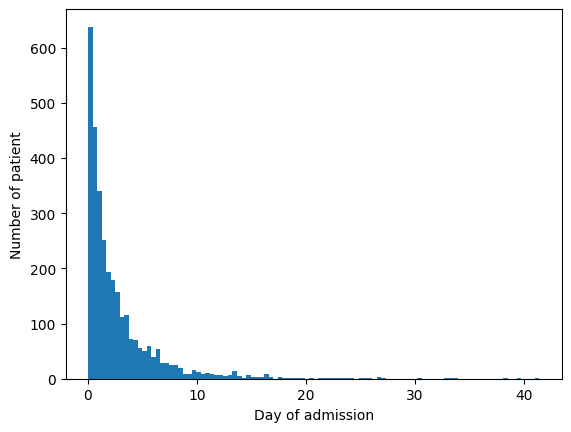

In [5]:
tot_df = eicu_df
tot_df = tot_df [['patientunitstayid', 'itemoffset', 'CAM', 'labelrec',
       'LOS']]
onset = tot_df[tot_df['labelrec']==1]
onset = onset.groupby('patientunitstayid').first()
onset.reset_index(inplace=True)
onset['itemoffset'] = onset['itemoffset'] / 24

plt.figure()
plt.xlabel('itemoffset')
onset['itemoffset'].plot.hist(bins=100)
plt.xlabel("Day of admission")
plt.ylabel("Number of patient")
plt.savefig("eicu_delirium",dpi=400, facecolor='white', bbox_inches = 'tight',transparent=True)
plt.show()


In [6]:
onset['itemoffset'].describe()

count    3153.000000
mean        2.780513
std         3.811776
min         0.041667
25%         0.583333
50%         1.500000
75%         3.458333
max        41.375000
Name: itemoffset, dtype: float64

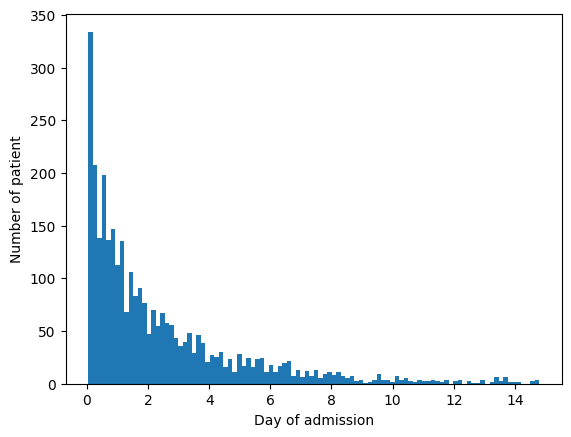

In [7]:
onset = onset[onset['itemoffset']<=15]

plt.figure()
plt.xlabel('itemoffset')
onset['itemoffset'].plot.hist(bins=100)
plt.xlabel("Day of admission")
plt.ylabel("Number of patient")
plt.savefig("eicu_delirium_max15",dpi=400, facecolor='white', bbox_inches = 'tight',transparent=True)
plt.show()


In [8]:
onset['itemoffset'].describe()

count    3096.000000
mean        2.433476
std         2.709549
min         0.041667
25%         0.541667
50%         1.458333
75%         3.333333
max        14.791667
Name: itemoffset, dtype: float64

In [9]:
onset = onset[onset['itemoffset']<=2]
onset['itemoffset'].describe()

count    1856.000000
mean        0.787603
std         0.567045
min         0.041667
25%         0.291667
50%         0.666667
75%         1.208333
max         2.000000
Name: itemoffset, dtype: float64

## MIMIC

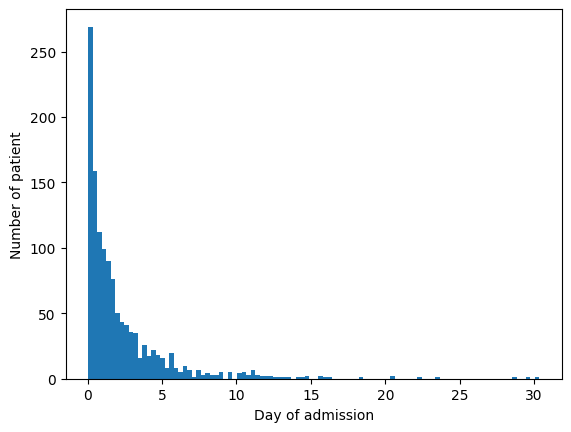

In [10]:
# tot_df = pd.concat([eicu_df, mimic_df],axis=0)
tot_df = mimic_df
tot_df = tot_df [['patientunitstayid', 'itemoffset', 'CAM', 'labelrec',
       'LOS']]
onset = tot_df[tot_df['labelrec']==1]
onset = onset.groupby('patientunitstayid').first()
onset.reset_index(inplace=True)
onset['itemoffset'] = onset['itemoffset'] / 24

plt.figure()
plt.xlabel('itemoffset')
onset['itemoffset'].plot.hist(bins=100)
plt.xlabel("Day of admission")
plt.ylabel("Number of patient")
plt.savefig("mimic_delirium",dpi=400, facecolor='white', bbox_inches = 'tight',transparent=True)
plt.show()


In [11]:
onset['itemoffset'].describe()

count    1262.000000
mean        2.276875
std         3.171346
min         0.041667
25%         0.416667
50%         1.250000
75%         2.822917
max        30.333333
Name: itemoffset, dtype: float64

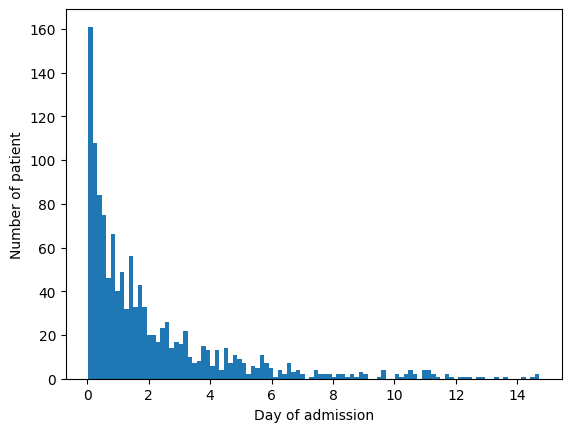

In [12]:
onset = onset[onset['itemoffset']<=15]

plt.figure()
plt.xlabel('itemoffset')
onset['itemoffset'].plot.hist(bins=100)
plt.xlabel("Day of admission")
plt.ylabel("Number of patient")
plt.savefig("mimic_delirium_max15",dpi=400, facecolor='white', bbox_inches = 'tight',transparent=True)
plt.show()


In [13]:
onset['itemoffset'].describe()

count    1250.000000
mean        2.093100
std         2.515912
min         0.041667
25%         0.416667
50%         1.208333
75%         2.750000
max        14.708333
Name: itemoffset, dtype: float64

In [14]:
onset = onset[onset['itemoffset']<=2]
onset['itemoffset'].describe()

count    838.000000
mean       0.762928
std        0.576360
min        0.041667
25%        0.260417
50%        0.625000
75%        1.208333
max        2.000000
Name: itemoffset, dtype: float64

In [15]:
mimic_pos.groupby('patientunitstayid').first().shape

(1262, 27)

# Selection

## check

In [16]:
eicu_df.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'Hemoglobin',
       'Platelets', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'CAM', 'labelrec', 'labelpt', 'LOS'],
      dtype='object')

In [17]:
features = ['gender', 'age', 'Height',
       'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 
       'sofa', 'sofa_wo_gcs', 'vent_flag', 'rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine', 'rate_phenylephrine',
       'CAM', 'labelrec',
       'labelpt']

In [18]:
def check(x):
    try:
        x = float(str(x).strip())
    except:
        x = np.nan
    return x

def check_itemvalue(df):
    for c in df.columns:
        df[c] = df[c].apply(lambda x: check(x))
    return df


In [19]:
eicu_df = check_itemvalue(eicu_df)
mimic_df = check_itemvalue(mimic_df)


In [20]:
eicu_df.shape,mimic_df.shape

((1827303, 24), (595051, 28))

In [21]:
eicu_df.shape,mimic_df.shape

((1827303, 24), (595051, 28))

## No of Patients

In [22]:
eicu_df = eicu_df[eicu_df['gender']!=0]
eicu_df.patientunitstayid.nunique()

16544

In [23]:
mimic_df.patientunitstayid.nunique()

6220

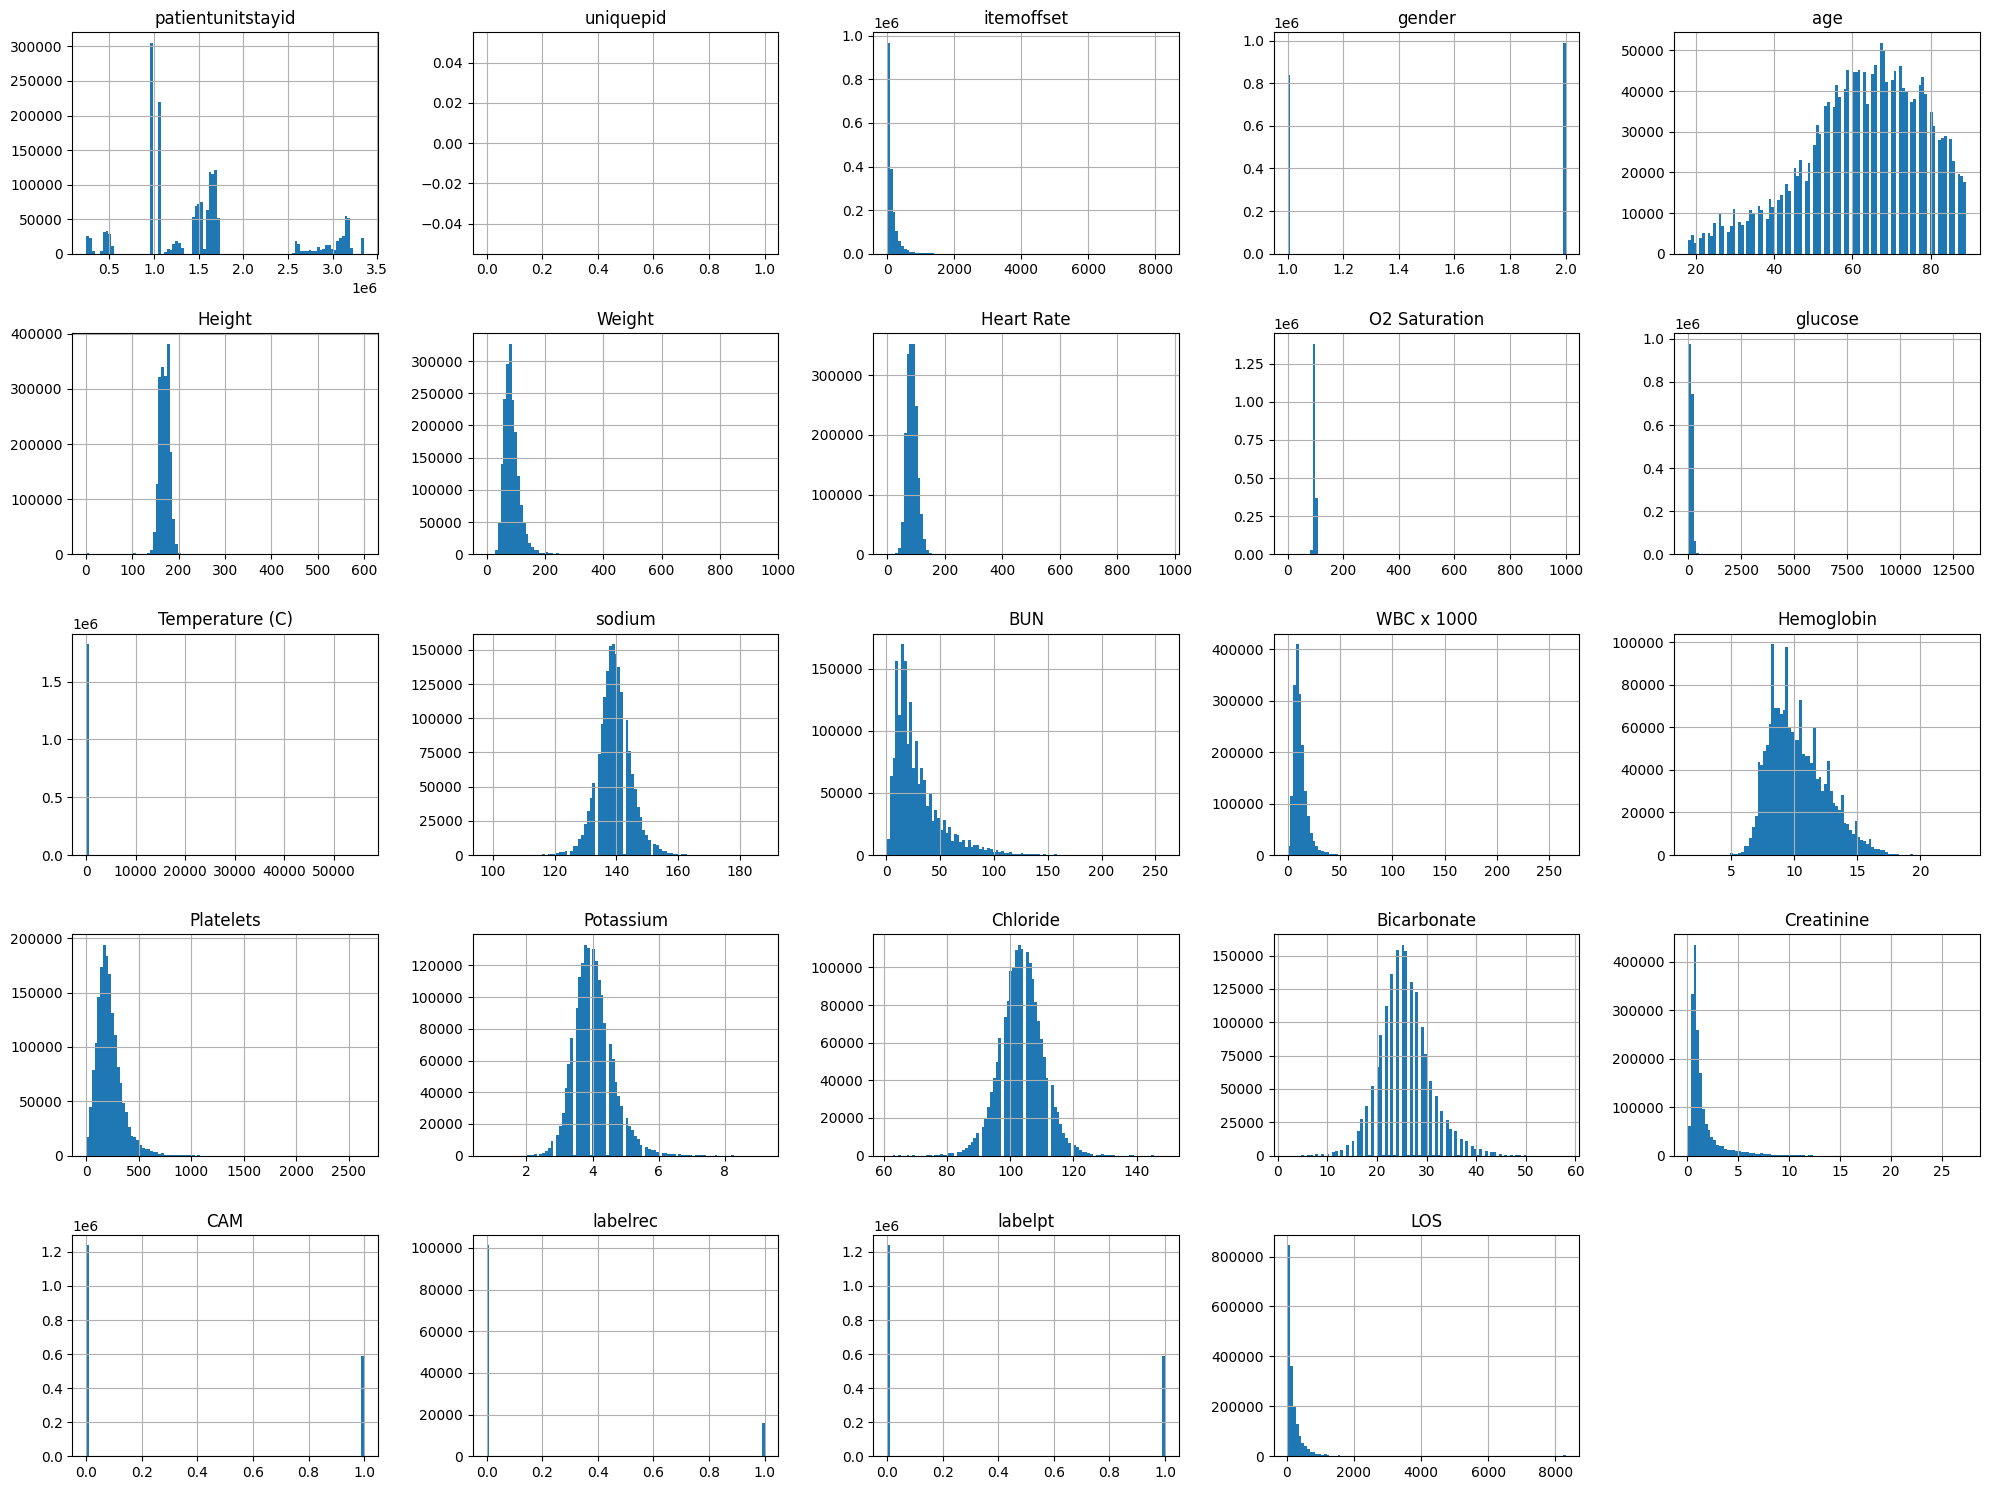

In [24]:
eicu_df.hist(bins=100, figsize=(20, 15))
plt.tight_layout()
plt.show()

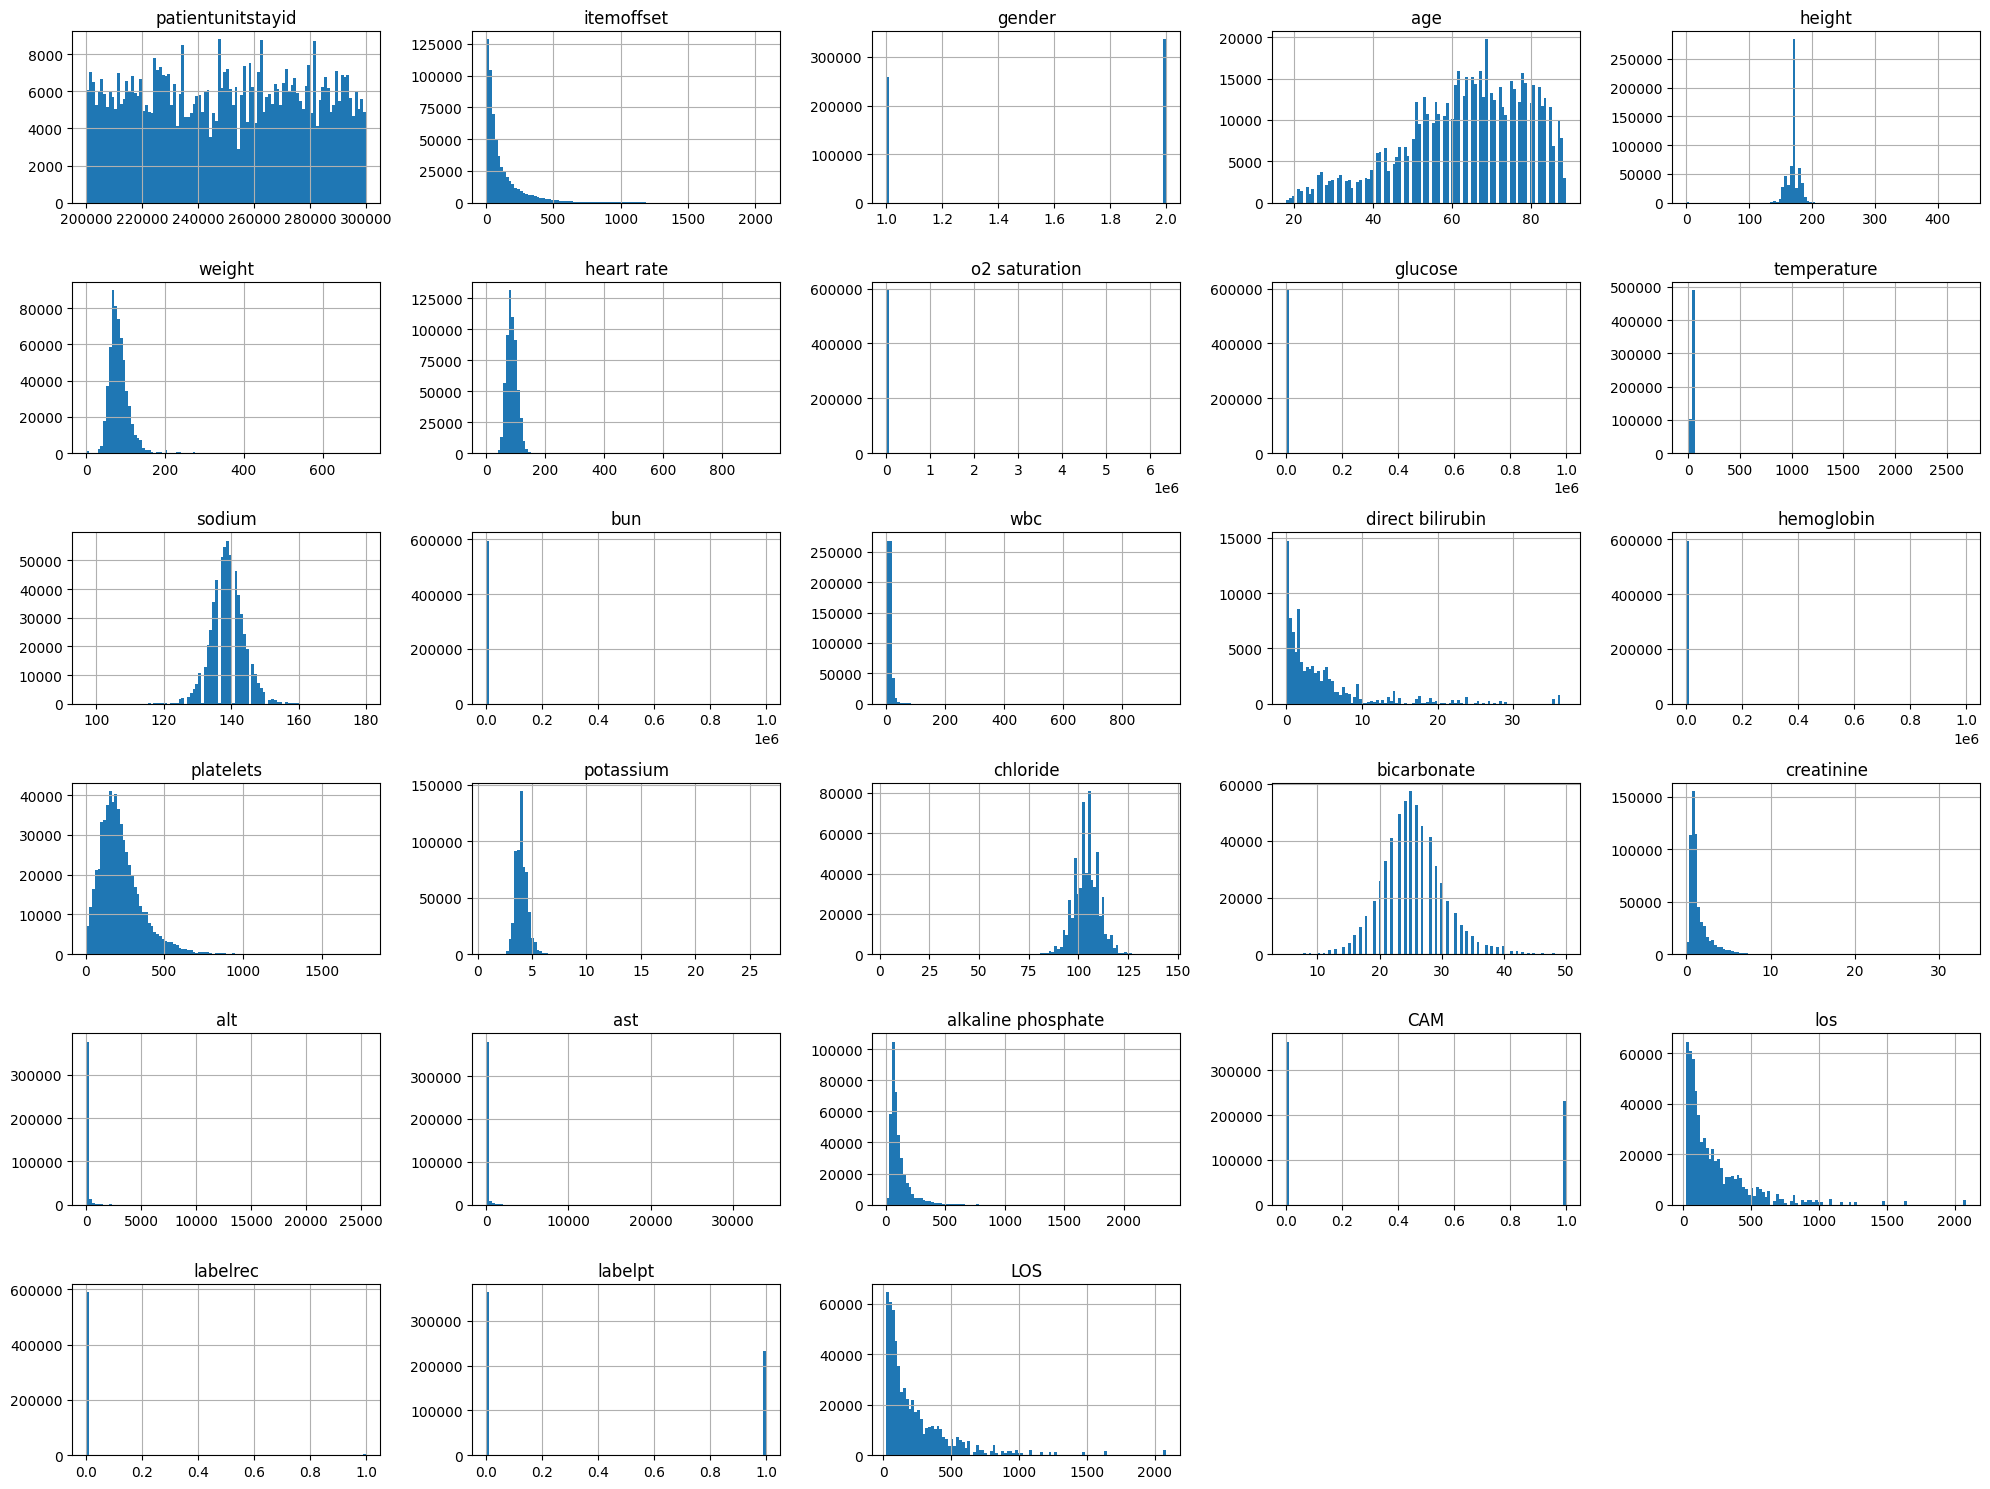

In [25]:
mimic_df.hist(bins=100, figsize=(20, 15))
plt.tight_layout()
plt.show()

## Outliers

In [26]:
log_dir = r"C:\Users\URHU\Documents\data_temp\log_dir"
def detect_outlier(data, columns, log_dir=log_dir, df_id=None):
    # Create a unique identifier for the dataframe
    if df_id is None:
        df_id = f"{hash(str(data.shape) + str(list(data.columns)))}"
    log_path = os.path.join(log_dir, df_id)
    os.makedirs(log_path, exist_ok=True)
    log_file = os.path.join(log_path, "progress.json")
    data_file = os.path.join(log_path, "data.pkl")

    # Load progress if exists
    if os.path.exists(log_file) and os.path.exists(data_file):
        with open(log_file, "r") as f:
            processed_cols = json.load(f)
        data = pd.read_pickle(data_file)
    else:
        processed_cols = []

    cols = list(columns)
    for col in tqdm(cols):
        if col in processed_cols:
            continue  # Skip already processed columns
        ncol = data[col]
        outliers = []
        threshold = 3.5
        mean = np.mean(ncol)
        std  = np.std(ncol)
        for x in ncol:
            z_score = (x - mean) / std
            if np.abs(z_score) > threshold:
                outliers.append(x)
        for y in outliers:
            data = data.drop(data[data[col] == y].index)
        # Save progress after each column
        processed_cols.append(col)
        with open(log_file, "w") as f:
            json.dump(processed_cols, f)
        data.to_pickle(data_file)
    return data

In [27]:
mimic_df.columns

Index(['patientunitstayid', 'itemoffset', 'gender', 'age', 'height', 'weight',
       'heart rate', 'o2 saturation', 'glucose', 'temperature', 'sodium',
       'bun', 'wbc', 'direct bilirubin', 'hemoglobin', 'platelets',
       'potassium', 'chloride', 'bicarbonate', 'creatinine', 'alt', 'ast',
       'alkaline phosphate', 'CAM', 'los', 'labelrec', 'labelpt', 'LOS'],
      dtype='object')

In [28]:
columns_for_outlier_mimic = ['height',  'weight',  'heart rate',  'o2 saturation',  'glucose',  'temperature',
 'sodium', 'bun', 'wbc', 'hemoglobin', 'platelets', 'potassium', 'chloride', 'bicarbonate', 'creatinine']



In [29]:
mimic_outlier = detect_outlier(mimic_df,columns_for_outlier_mimic, df_id="mimic_outlier310")

100%|██████████| 15/15 [00:00<?, ?it/s]


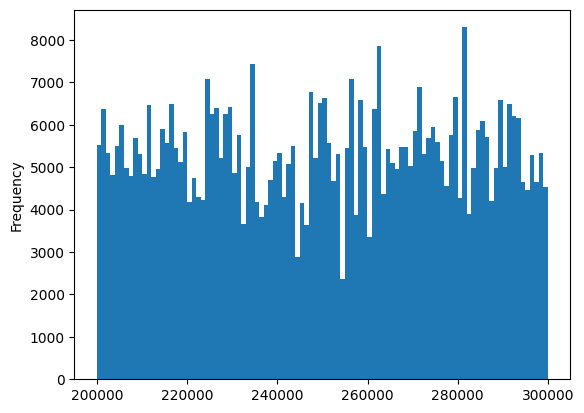

count    534381.000000
mean     250124.387959
std       29027.455203
min      200001.000000
25%      224886.000000
50%      250567.000000
75%      275223.000000
max      299979.000000
Name: patientunitstayid, dtype: float64


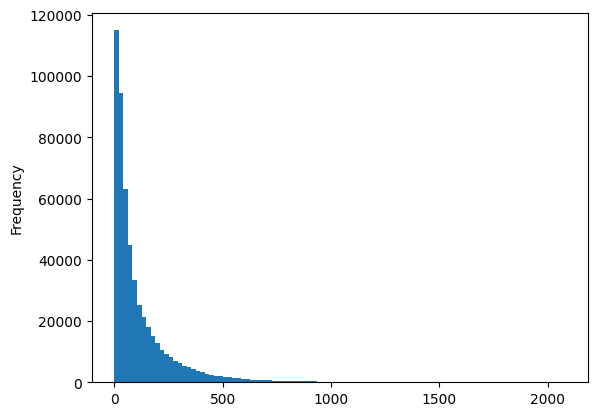

count    534381.000000
mean        120.935684
std         167.643553
min           1.000000
25%          25.000000
50%          61.000000
75%         150.000000
max        2082.000000
Name: itemoffset, dtype: float64


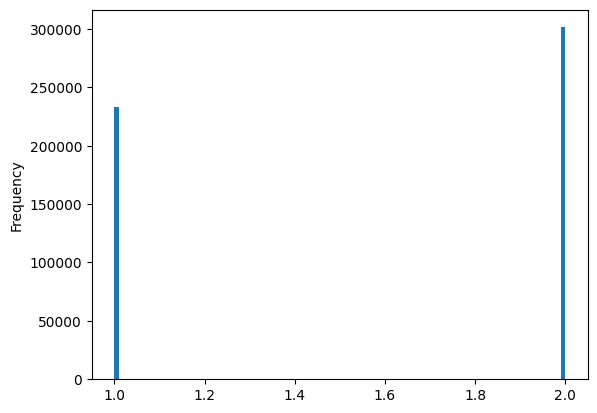

count    534381.000000
mean          1.563978
std           0.495890
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: gender, dtype: float64


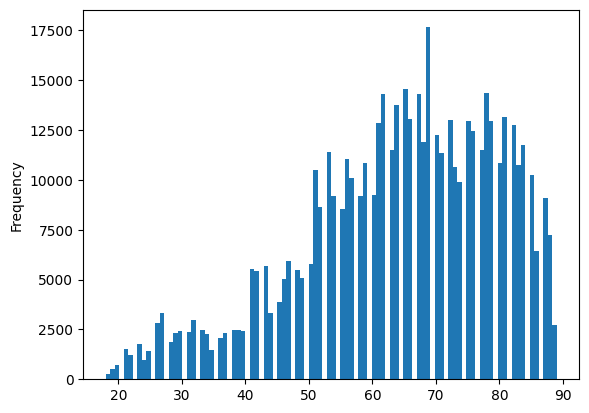

count    534381.000000
mean         64.084915
std          15.576317
min          18.000000
25%          54.000000
50%          66.000000
75%          77.000000
max          89.000000
Name: age, dtype: float64


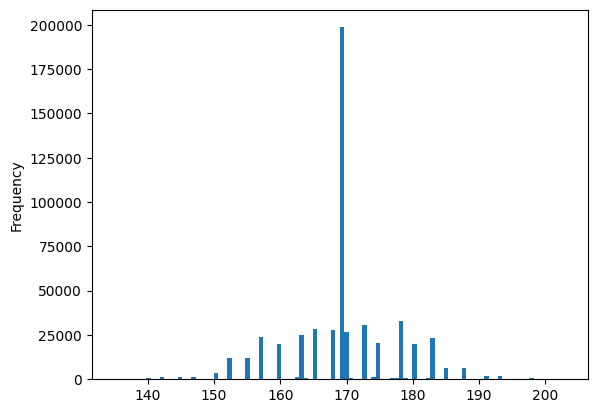

count    534381.000000
mean        169.388654
std           8.104780
min         135.000000
25%         168.000000
50%         169.350688
75%         173.000000
max         203.000000
Name: height, dtype: float64


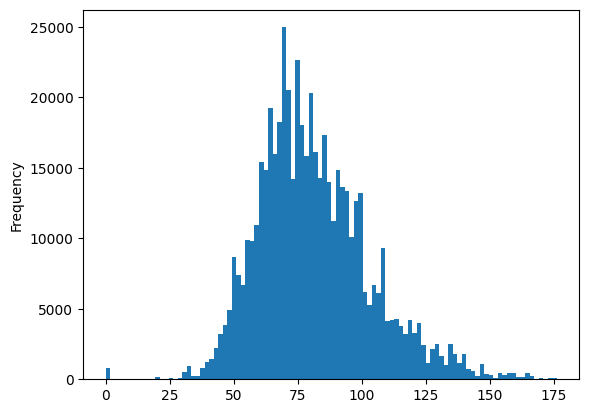

count    534381.000000
mean         81.334254
std          21.921745
min           0.000000
25%          66.100000
50%          78.400000
75%          94.050000
max         176.115000
Name: weight, dtype: float64


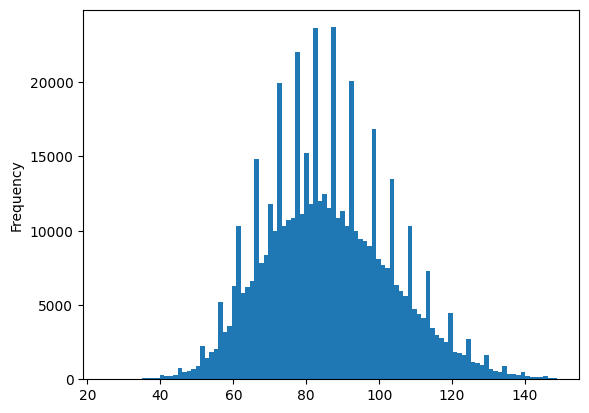

count    534381.000000
mean         86.289386
std          17.450001
min          25.000000
25%          74.000000
50%          85.000000
75%          98.000000
max         148.666667
Name: heart rate, dtype: float64


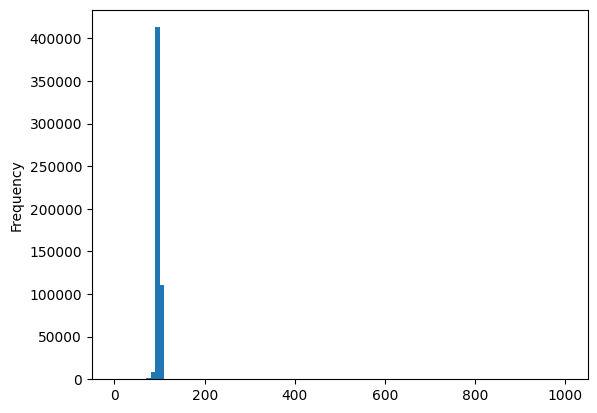

count    534381.000000
mean         96.749229
std           4.781602
min           0.000000
25%          95.000000
50%          97.000000
75%          99.000000
max        1000.000000
Name: o2 saturation, dtype: float64


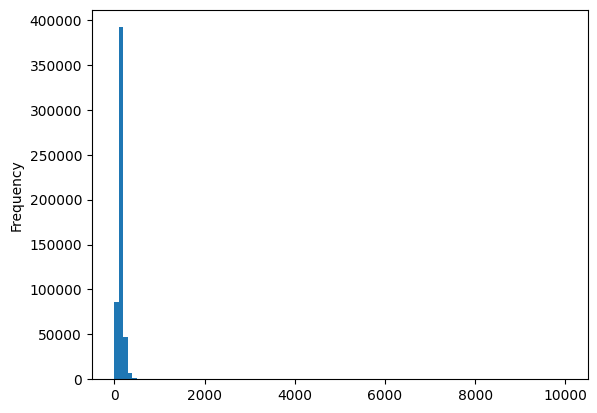

count    534381.000000
mean        140.280104
std          56.006734
min           0.000000
25%         107.000000
50%         128.000000
75%         158.000000
max        9999.000000
Name: glucose, dtype: float64


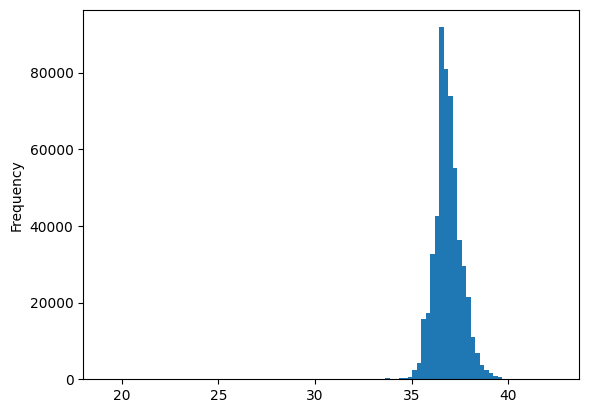

count    534381.000000
mean         36.884998
std           0.717048
min          19.166667
25%          36.444444
50%          36.833333
75%          37.277778
max          42.500000
Name: temperature, dtype: float64


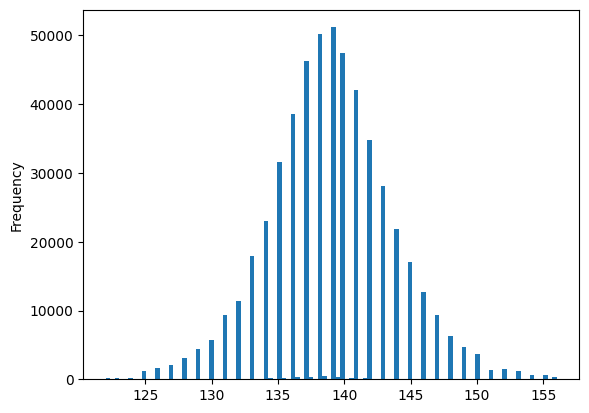

count    534381.000000
mean        138.953165
std           4.663367
min         122.000000
25%         136.000000
50%         139.000000
75%         142.000000
max         156.000000
Name: sodium, dtype: float64


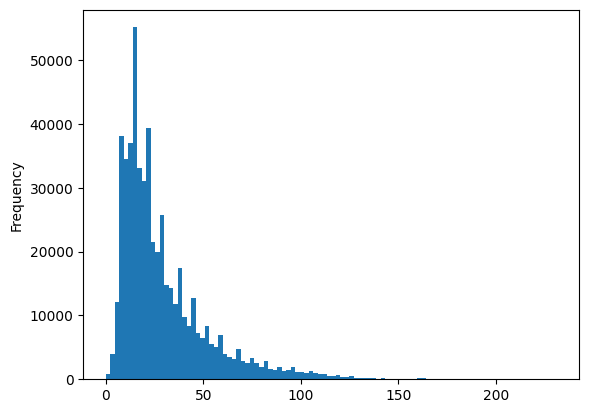

count    534381.000000
mean         29.694799
std          23.346786
min           0.000000
25%          14.000000
50%          22.000000
75%          38.000000
max         231.000000
Name: bun, dtype: float64


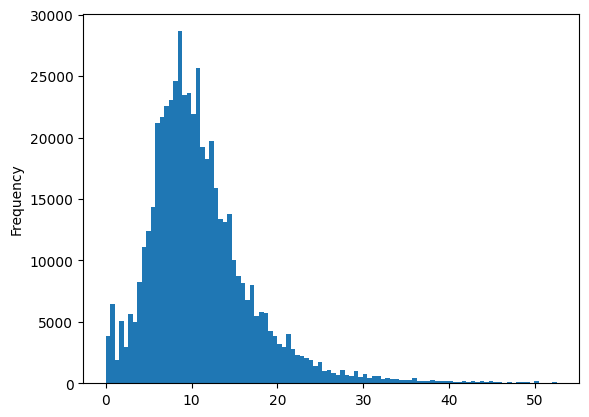

count    534381.000000
mean         11.099376
std           6.249161
min           0.000000
25%           7.100000
50%          10.000000
75%          13.700000
max          52.500000
Name: wbc, dtype: float64


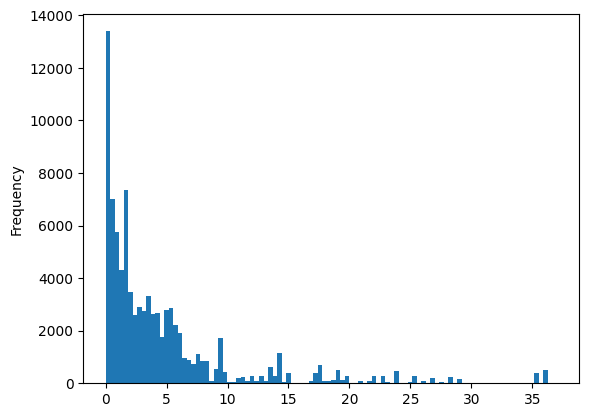

count    87251.000000
mean         4.634237
std          6.159334
min          0.000000
25%          0.900000
50%          2.500000
75%          5.500000
max         37.000000
Name: direct bilirubin, dtype: float64


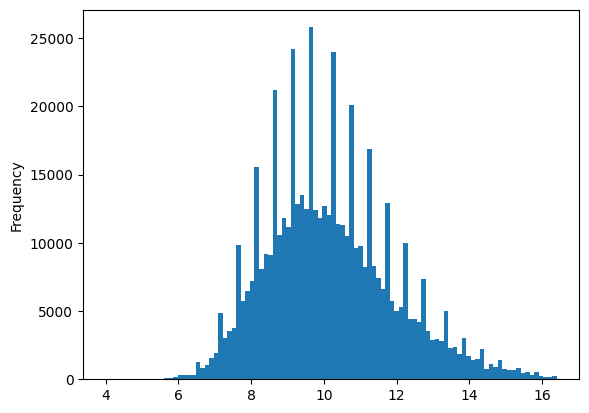

count    534381.000000
mean         10.173678
std           1.761341
min           4.000000
25%           8.900000
50%          10.000000
75%          11.200000
max          16.400000
Name: hemoglobin, dtype: float64


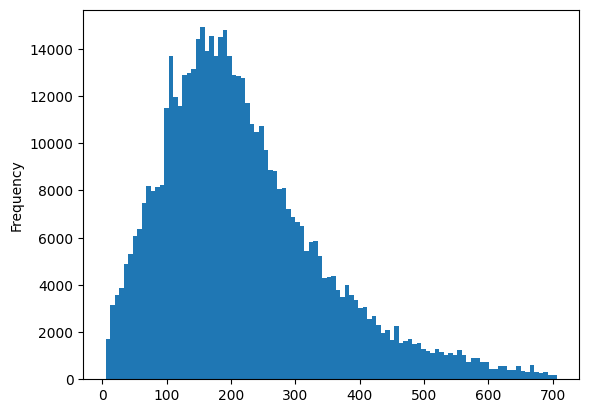

count    534381.000000
mean        219.353180
std         125.933432
min           5.000000
25%         130.000000
50%         196.000000
75%         284.000000
max         706.000000
Name: platelets, dtype: float64


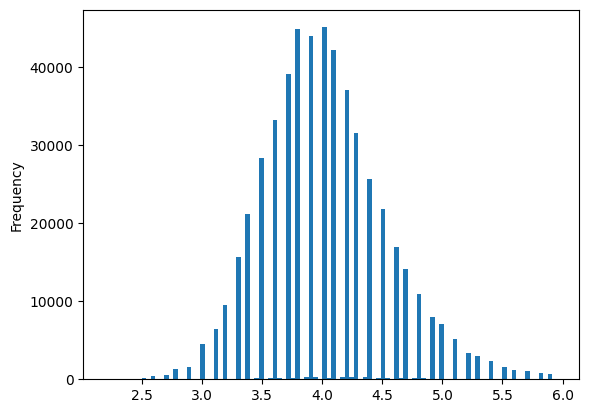

count    534381.000000
mean          4.022801
std           0.511142
min           2.200000
25%           3.700000
50%           4.000000
75%           4.300000
max           5.950000
Name: potassium, dtype: float64


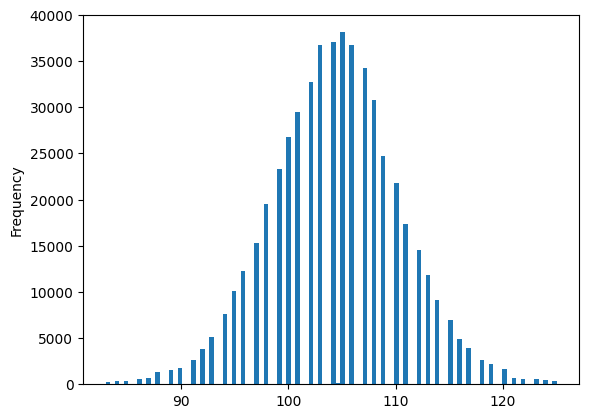

count    534381.000000
mean        104.395639
std           5.997601
min          83.000000
25%         101.000000
50%         104.000000
75%         108.000000
max         125.000000
Name: chloride, dtype: float64


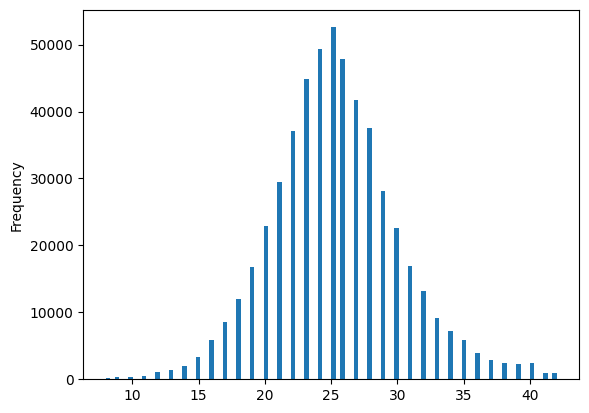

count    534381.000000
mean         25.322838
std           4.814114
min           8.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          42.000000
Name: bicarbonate, dtype: float64


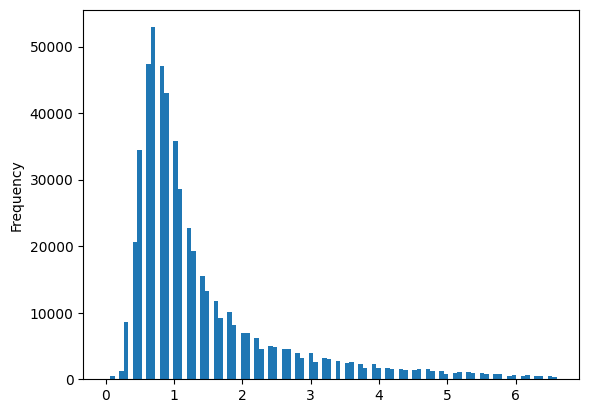

count    534381.000000
mean          1.394986
std           1.132268
min           0.000000
25%           0.700000
50%           1.000000
75%           1.600000
max           6.600000
Name: creatinine, dtype: float64


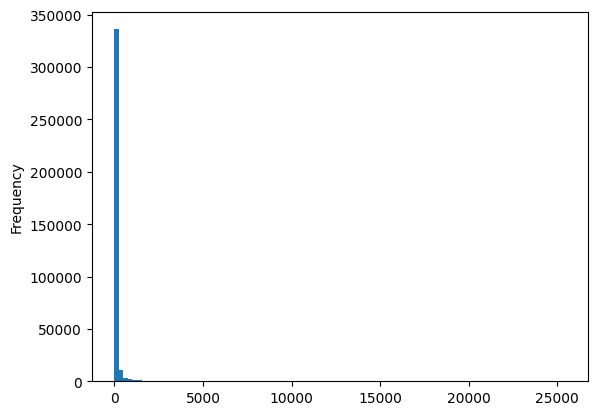

count    357639.000000
mean        108.700072
std         509.350602
min           0.000000
25%          16.000000
50%          28.000000
75%          58.000000
max       25460.000000
Name: alt, dtype: float64


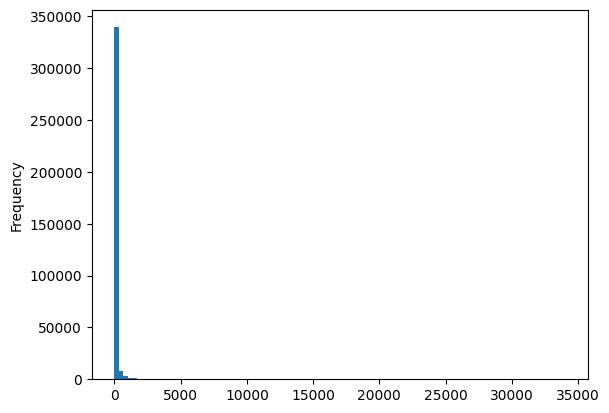

count    357326.000000
mean        134.568992
std         662.166985
min           3.000000
25%          24.000000
50%          39.000000
75%          76.000000
max       34040.000000
Name: ast, dtype: float64


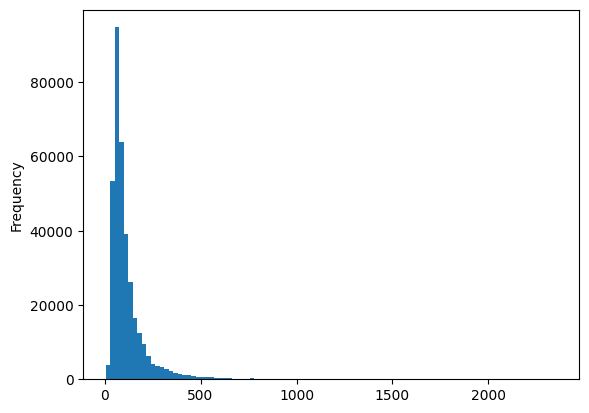

count    354404.000000
mean        117.792342
std         118.391740
min           6.000000
25%          60.000000
50%          85.000000
75%         131.000000
max        2355.000000
Name: alkaline phosphate, dtype: float64


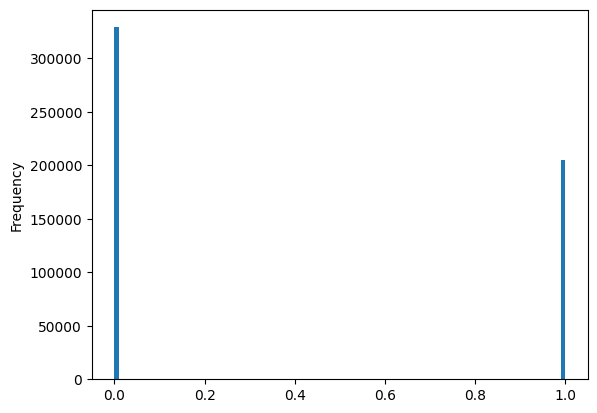

count    534381.000000
mean          0.384093
std           0.486381
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: CAM, dtype: float64


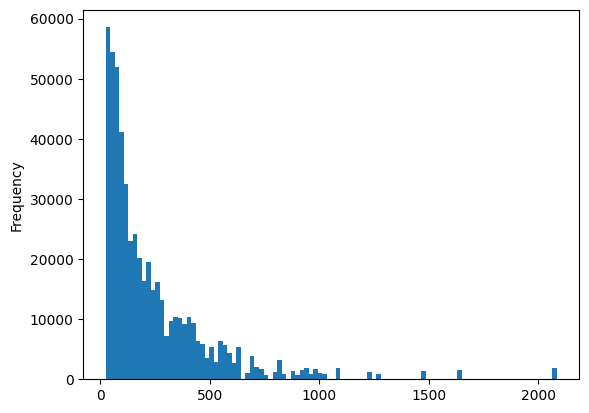

count    534381.000000
mean        243.030658
std         263.329834
min          24.002400
25%          71.791200
50%         151.886400
75%         328.831200
max        2084.361600
Name: los, dtype: float64


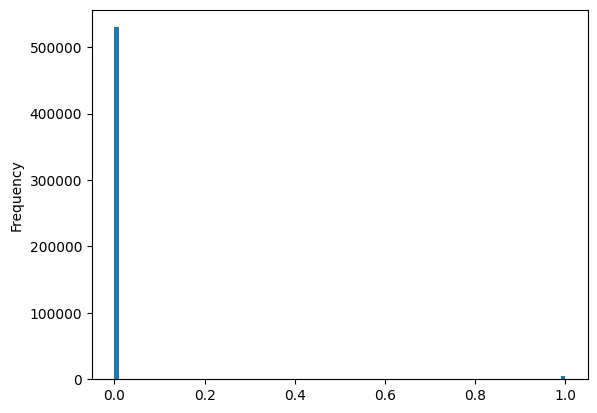

count    534381.000000
mean          0.008614
std           0.092410
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: labelrec, dtype: float64


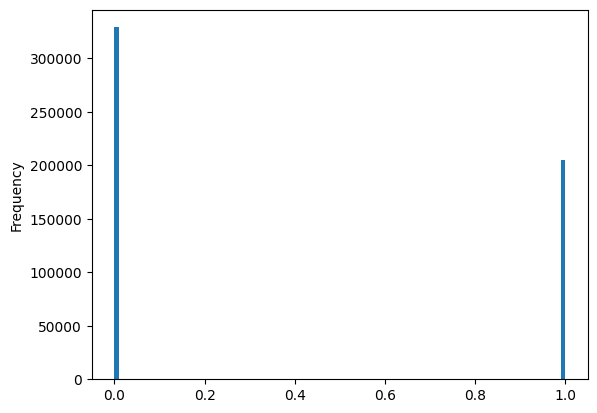

count    534381.000000
mean          0.384093
std           0.486381
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: labelpt, dtype: float64


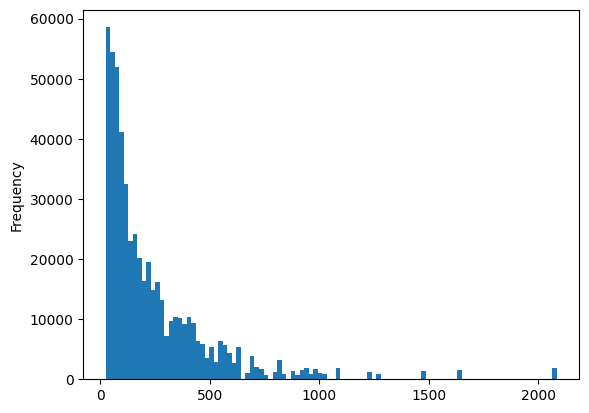

count    534381.000000
mean        243.030658
std         263.329834
min          24.002400
25%          71.791200
50%         151.886400
75%         328.831200
max        2084.361600
Name: LOS, dtype: float64


In [30]:
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

column = mimic_outlier.columns

for col in column:
    ncol = mimic_outlier[col]
    plt.figure()
    plt.xlabel(col)
    ncol.plot.hist(bins=100)
    plt.show()
    print(ncol.describe())

In [31]:
#show col
eicu_df.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'Hemoglobin',
       'Platelets', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'CAM', 'labelrec', 'labelpt', 'LOS'],
      dtype='object')

In [33]:
columns_for_outlier_eicu = [ 'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose', 'Temperature (C)', 
'sodium', 'BUN', 'WBC x 1000', 'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine']

eicu_outlier = detect_outlier(eicu_df, columns_for_outlier_eicu, df_id="eicu_outlier310")

100%|██████████| 15/15 [7:51:54<00:00, 1887.64s/it]  


  0%|          | 0/24 [00:00<?, ?it/s]

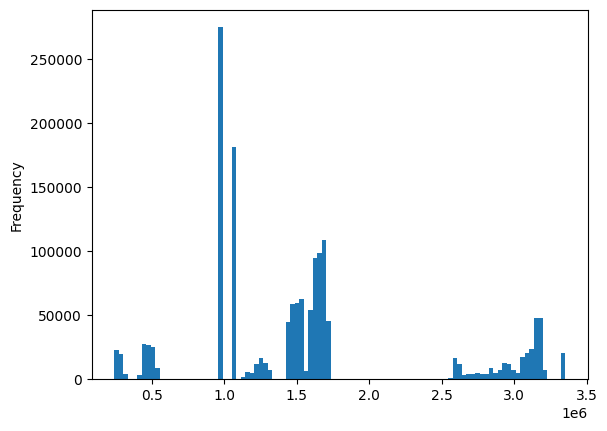

  4%|▍         | 1/24 [00:00<00:16,  1.43it/s]

count    1.580868e+06
mean     1.575906e+06
std      7.868603e+05
min      2.421540e+05
25%      9.793460e+05
50%      1.504930e+06
75%      1.688670e+06
max      3.353077e+06
Name: patientunitstayid, dtype: float64


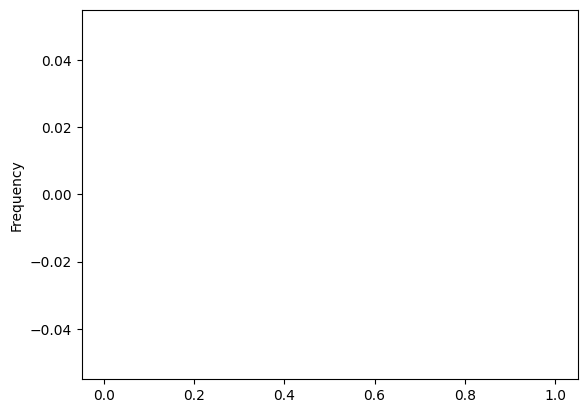

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: uniquepid, dtype: float64

  8%|▊         | 2/24 [00:00<00:08,  2.47it/s]

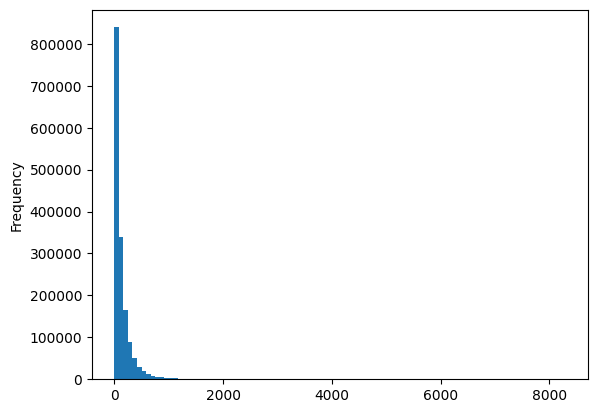

 12%|█▎        | 3/24 [00:01<00:07,  2.97it/s]

count    1.580868e+06
mean     1.413345e+02
std      2.571749e+02
min      1.000000e+00
25%      3.100000e+01
50%      7.600000e+01
75%      1.690000e+02
max      8.293000e+03
Name: itemoffset, dtype: float64


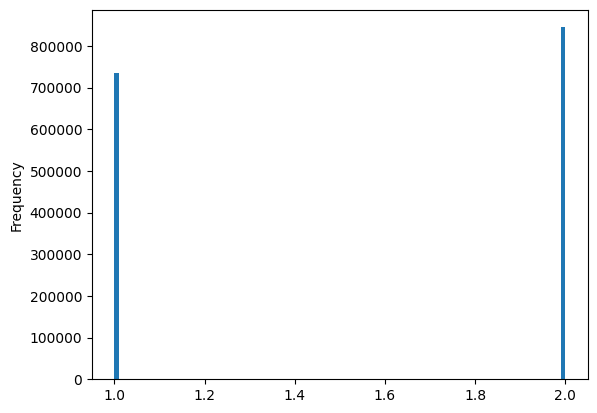

 17%|█▋        | 4/24 [00:01<00:06,  3.32it/s]

count    1.580868e+06
mean     1.534448e+00
std      4.988121e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: gender, dtype: float64


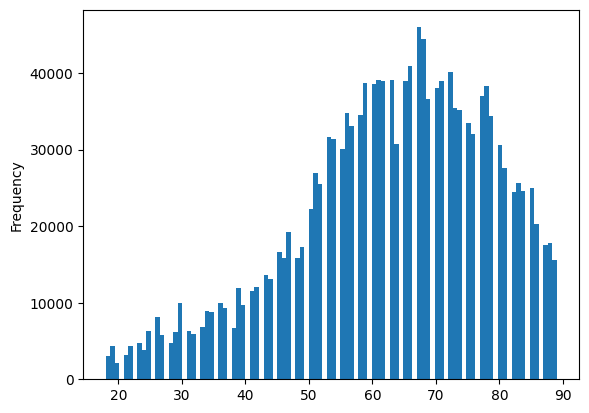

 21%|██        | 5/24 [00:01<00:05,  3.70it/s]

count    1.580868e+06
mean     6.292093e+01
std      1.553069e+01
min      1.800000e+01
25%      5.400000e+01
50%      6.500000e+01
75%      7.500000e+01
max      8.900000e+01
Name: age, dtype: float64


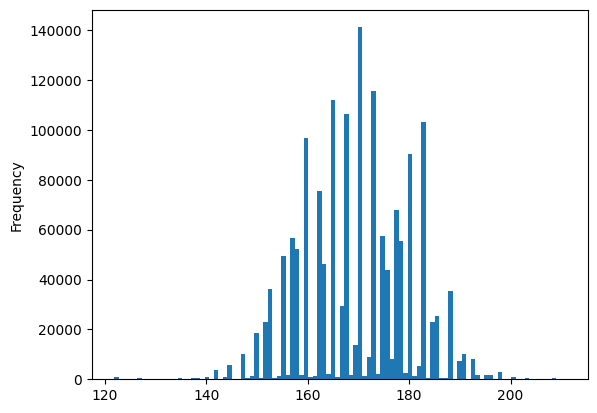

 25%|██▌       | 6/24 [00:01<00:04,  3.88it/s]

count    1.580868e+06
mean     1.696030e+02
std      1.059606e+01
min      1.219000e+02
25%      1.626000e+02
50%      1.700000e+02
75%      1.778000e+02
max      2.108000e+02
Name: Height, dtype: float64


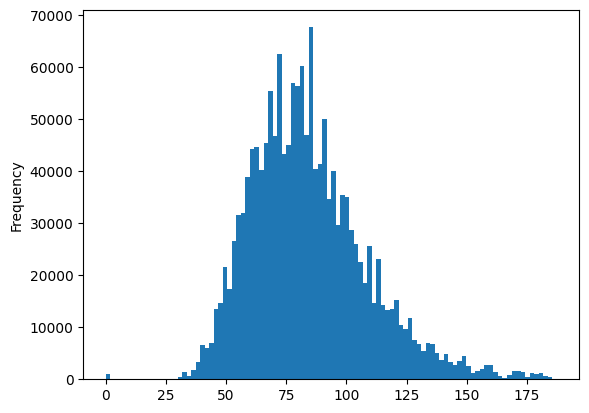

 29%|██▉       | 7/24 [00:02<00:07,  2.27it/s]

count    1.580868e+06
mean     8.437222e+01
std      2.434303e+01
min      0.000000e+00
25%      6.720000e+01
50%      8.150000e+01
75%      9.780000e+01
max      1.873000e+02
Name: Weight, dtype: float64


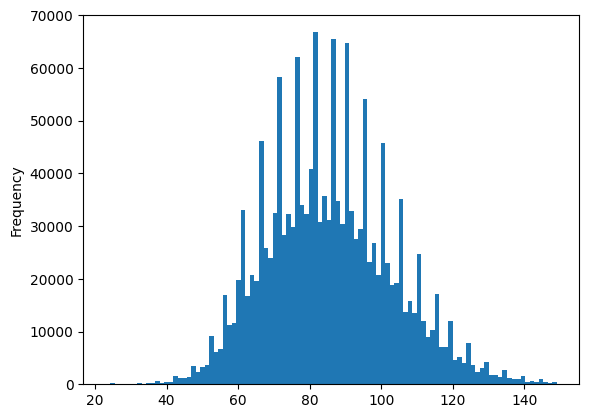

 33%|███▎      | 8/24 [00:02<00:06,  2.60it/s]

count    1.548110e+06
mean     8.565166e+01
std      1.771967e+01
min      2.300000e+01
25%      7.300000e+01
50%      8.500000e+01
75%      9.700000e+01
max      1.490000e+02
Name: Heart Rate, dtype: float64


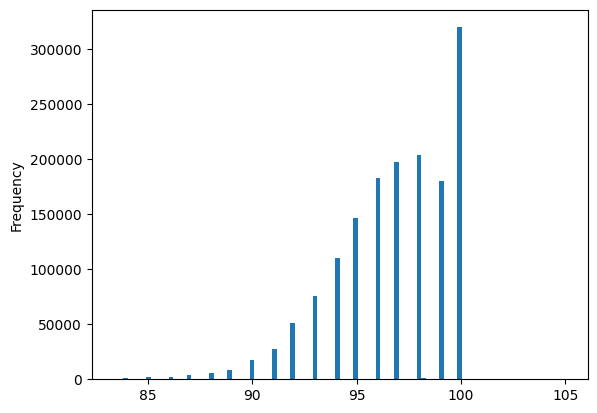

 38%|███▊      | 9/24 [00:03<00:05,  2.92it/s]

count    1.547004e+06
mean     9.676844e+01
std      2.792492e+00
min      8.340000e+01
25%      9.500000e+01
50%      9.700000e+01
75%      9.900000e+01
max      1.050000e+02
Name: O2 Saturation, dtype: float64


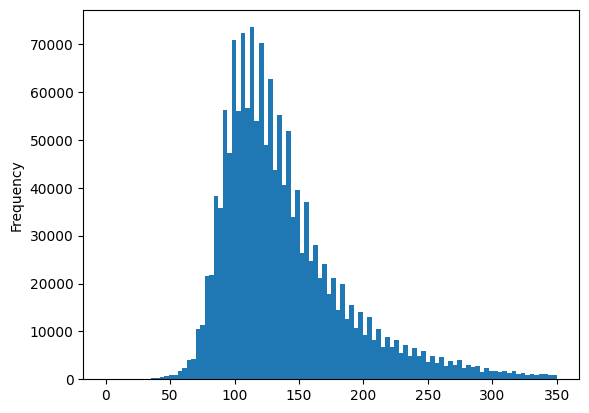

 42%|████▏     | 10/24 [00:03<00:04,  3.19it/s]

count    1.546469e+06
mean     1.381111e+02
std      4.853272e+01
min      0.000000e+00
25%      1.050000e+02
50%      1.260000e+02
75%      1.580000e+02
max      3.500000e+02
Name: glucose, dtype: float64


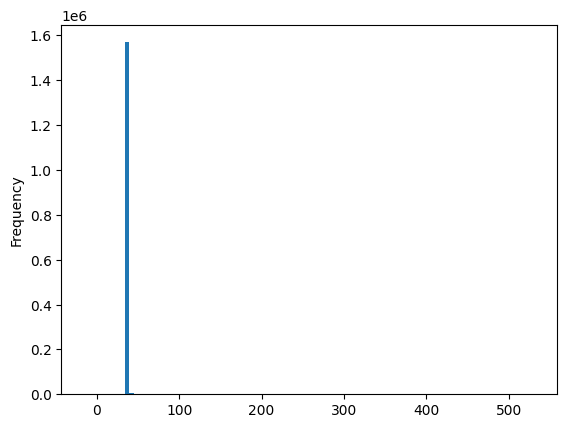

 46%|████▌     | 11/24 [00:03<00:03,  3.28it/s]

count    1.579455e+06
mean     3.696863e+01
std      2.729478e+00
min     -1.550000e+01
25%      3.660000e+01
50%      3.680000e+01
75%      3.716964e+01
max      5.316000e+02
Name: Temperature (C), dtype: float64


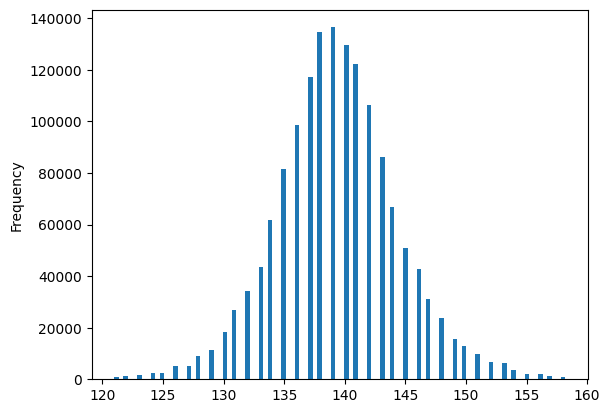

 50%|█████     | 12/24 [00:03<00:03,  3.52it/s]

count    1.516377e+06
mean     1.393441e+02
std      5.051520e+00
min      1.210000e+02
25%      1.360000e+02
50%      1.390000e+02
75%      1.420000e+02
max      1.582000e+02
Name: sodium, dtype: float64


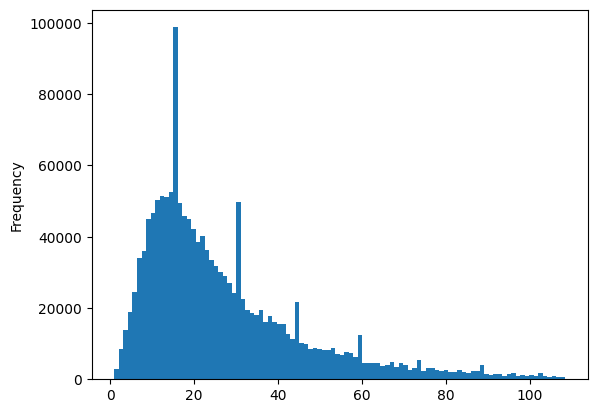

 54%|█████▍    | 13/24 [00:04<00:03,  3.48it/s]

count    1.510245e+06
mean     2.715605e+01
std      1.933229e+01
min      1.000000e+00
25%      1.300000e+01
50%      2.160000e+01
75%      3.500000e+01
max      1.084000e+02
Name: BUN, dtype: float64


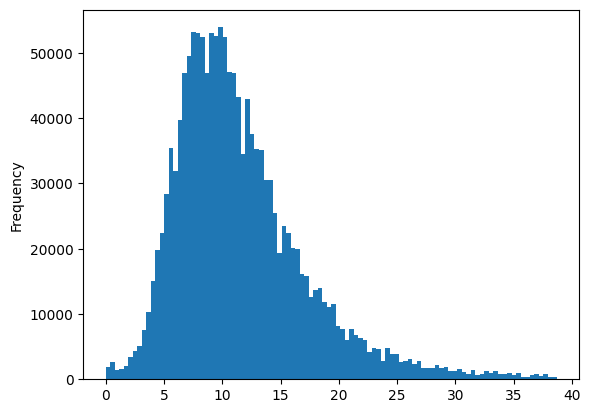

 58%|█████▊    | 14/24 [00:04<00:02,  3.62it/s]

count    1.492277e+06
mean     1.157286e+01
std      5.662573e+00
min      0.000000e+00
25%      7.700000e+00
50%      1.042000e+01
75%      1.420000e+01
max      3.869000e+01
Name: WBC x 1000, dtype: float64


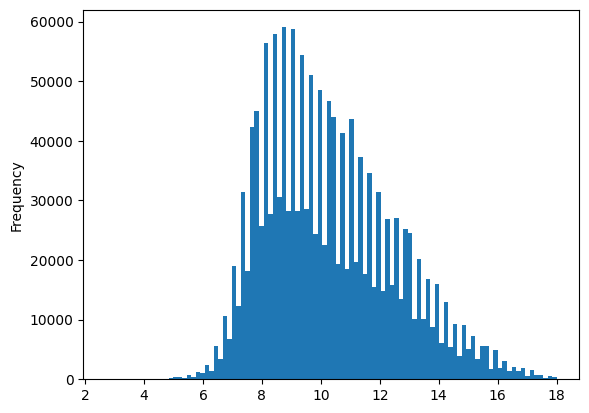

 62%|██████▎   | 15/24 [00:04<00:02,  3.73it/s]

count    1.502412e+06
mean     1.028331e+01
std      2.218509e+00
min      2.700000e+00
25%      8.600000e+00
50%      9.900000e+00
75%      1.170000e+01
max      1.800000e+01
Name: Hemoglobin, dtype: float64


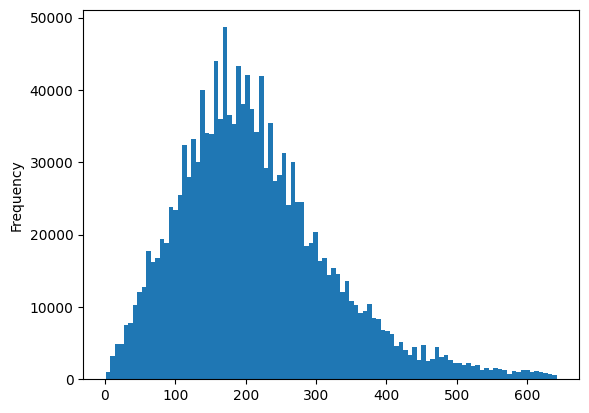

 67%|██████▋   | 16/24 [00:05<00:02,  3.19it/s]

count    1.476255e+06
mean     2.143539e+02
std      1.086046e+02
min      1.000000e+00
25%      1.390000e+02
50%      1.990000e+02
75%      2.720000e+02
max      6.420000e+02
Name: Platelets, dtype: float64


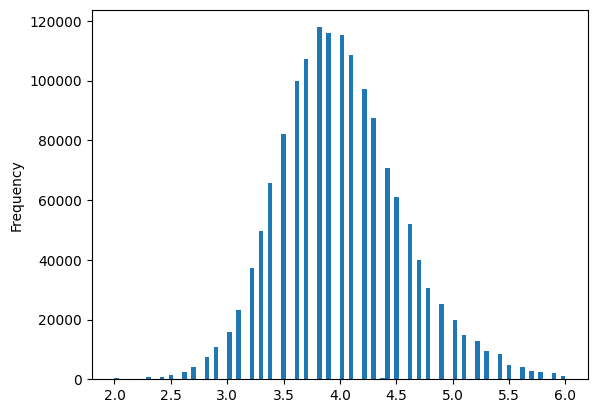

 71%|███████   | 17/24 [00:05<00:02,  3.30it/s]

count    1.517613e+06
mean     4.001056e+00
std      5.508838e-01
min      2.000000e+00
25%      3.600000e+00
50%      4.000000e+00
75%      4.300000e+00
max      6.000000e+00
Name: Potassium, dtype: float64


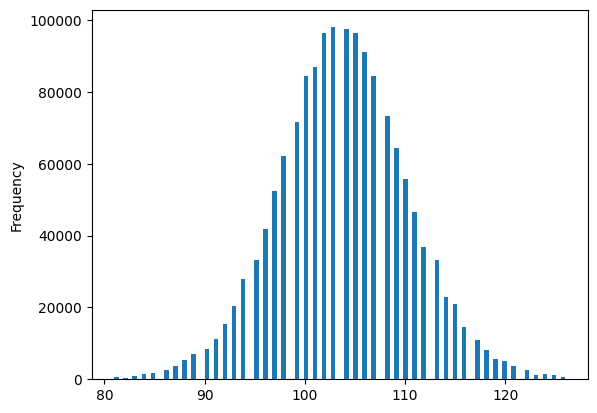

 75%|███████▌  | 18/24 [00:05<00:01,  3.14it/s]

count    1.512105e+06
mean     1.037905e+02
std      6.424640e+00
min      8.100000e+01
25%      1.000000e+02
50%      1.040000e+02
75%      1.080000e+02
max      1.260000e+02
Name: Chloride, dtype: float64


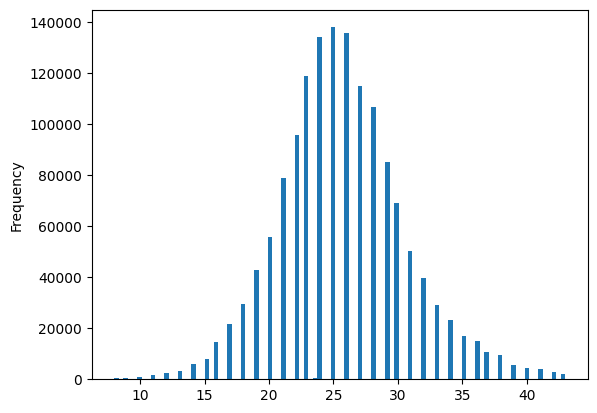

 79%|███████▉  | 19/24 [00:06<00:01,  3.00it/s]

count    1.482234e+06
mean     2.566530e+01
std      4.923126e+00
min      8.000000e+00
25%      2.300000e+01
50%      2.500000e+01
75%      2.800000e+01
max      4.300000e+01
Name: Bicarbonate, dtype: float64


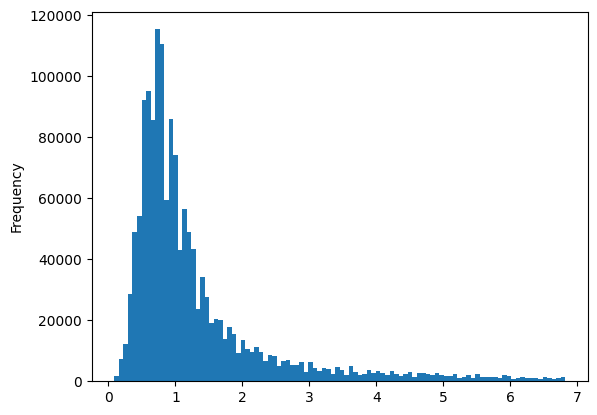

 83%|████████▎ | 20/24 [00:06<00:01,  3.25it/s]

count    1.509813e+06
mean     1.312103e+00
std      1.124999e+00
min      9.000000e-02
25%      6.600000e-01
50%      9.200000e-01
75%      1.470000e+00
max      6.820000e+00
Name: Creatinine, dtype: float64


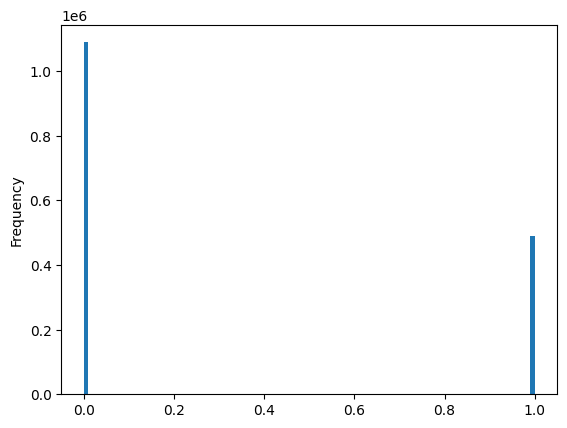

count    1.580868e+06
mean     3.108337e-01
std      4.628350e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: CAM, dtype: float64

 88%|████████▊ | 21/24 [00:06<00:00,  3.57it/s]

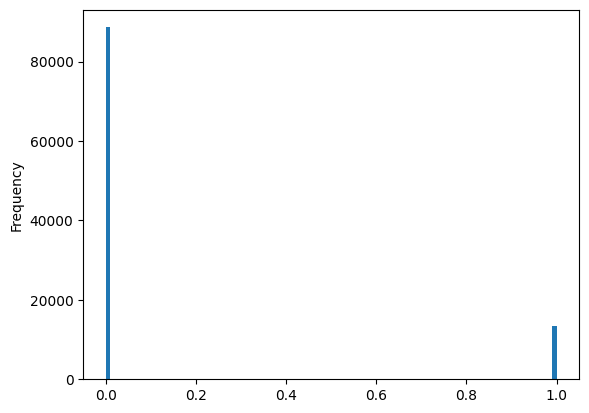

 92%|█████████▏| 22/24 [00:06<00:00,  3.75it/s]

count    102185.000000
mean          0.132378
std           0.338902
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: labelrec, dtype: float64


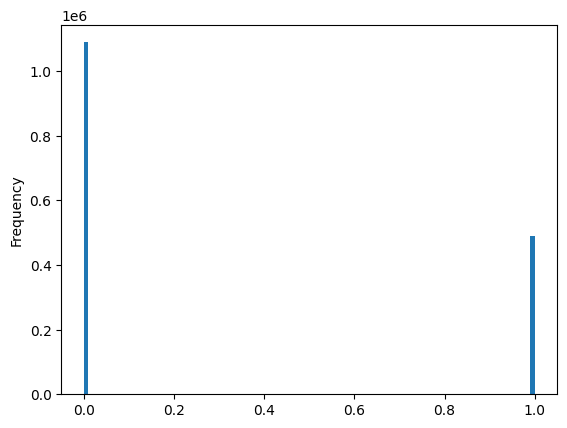

 96%|█████████▌| 23/24 [00:07<00:00,  3.71it/s]

count    1.580868e+06
mean     3.108337e-01
std      4.628350e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: labelpt, dtype: float64


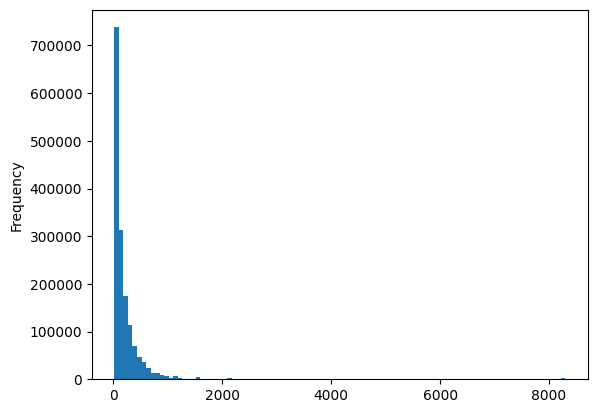

100%|██████████| 24/24 [00:07<00:00,  3.25it/s]

count    1.580868e+06
mean     2.146155e+02
std      4.209798e+02
min      2.400000e+01
25%      6.271440e+01
50%      1.171488e+02
75%      2.543328e+02
max      8.299049e+03
Name: LOS, dtype: float64


In [34]:
# load

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

column = eicu_outlier.columns

for col in tqdm(column):
    ncol = eicu_outlier[col]
    plt.figure()
    plt.xlabel(col)
    ncol.plot.hist(bins=100)
    plt.show()
    print(ncol.describe())

In [35]:
eicu_outlier.patientunitstayid.nunique(), mimic_outlier.patientunitstayid.nunique()

(15753, 6000)

## Clipping

In [31]:
def check_in_range(df):
    df['Temperature (C)'].clip(22, 45, inplace=True)
    return df

In [ ]:
#rename 'temperature' col from mimic to 'Temperature (C)'
mimic_outlier.rename(columns={'temperature': 'Temperature (C)'}, inplace=True)
#rename 'Temperature' to 'Temperature (C)' in eicu
eicu_outlier.rename(columns={'Temperature': 'Temperature (C)'}, inplace=True)

In [ ]:
eicu_df = check_in_range(eicu_outlier)
mimic_df = check_in_range(mimic_outlier)

C:\Users\URHU\AppData\Local\Temp\ipykernel_35996\4176276323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature (C)'].clip(22, 45, inplace=True)
C:\Users\URHU\AppData\Local\Temp\ipykernel_35996\4176276323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Data prepration before normalizing 

In [ ]:
eicu_df.columns, mimic_df.columns

(Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'Gender', 'Age',
        'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'Glucose',
        'Temperature (C)', 'Sodium', 'BUN', 'WBC', 'Hemoglobin', 'Platelets',
        'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine', 'CAM', 'labelrec',
        'labelpt', 'LOS'],
       dtype='object'),
 Index(['patientunitstayid', 'itemoffset', 'gender', 'age', 'height', 'weight',
        'heart rate', 'o2 saturation', 'glucose', 'Temperature (C)', 'sodium',
        'bun', 'wbc', 'direct bilirubin', 'hemoglobin', 'platelets',
        'potassium', 'chloride', 'bicarbonate', 'creatinine', 'alt', 'ast',
        'alkaline phosphate', 'CAM', 'los', 'labelrec', 'labelpt', 'LOS'],
       dtype='object'))

### Normalizer for Embedding

In [ ]:
# Define mapping from mimic to eicu column names
mimic_to_eicu = {
    'gender': 'Gender',
    'age': 'Age',
    'height': 'Height',
    'weight': 'Weight',
    'heart rate': 'Heart Rate',
    'o2 saturation': 'O2 Saturation',
    'glucose': 'Glucose',
    'Temperature (C)': 'Temperature (C)',
    'sodium': 'Sodium',
    'bun': 'BUN',
    'wbc': 'WBC',
    'direct bilirubin': 'direct bilirubin',
    'hemoglobin': 'Hemoglobin',
    'platelets': 'Platelets',
    'potassium': 'Potassium',
    'chloride': 'Chloride',
    'bicarbonate': 'Bicarbonate',
    'creatinine': 'Creatinine',
    'alt': 'ALT',
    'ast': 'AST',
    'alkaline phosphate': 'Alkaline Phosphate',
    'CAM': 'CAM',
    'labelrec': 'labelrec',
    'labelpt': 'labelpt',
    'LOS': 'LOS',
    'patientunitstayid': 'patientunitstayid',
    'itemoffset': 'itemoffset'
}

# Rename columns in mimic_df
mimic_df.rename(columns=mimic_to_eicu, inplace=True)

categ_col = ['Gender'
            #  ,'sofa', 'sofa_wo_gcs'
             ]

model_columns = [
       'patientunitstayid', 'itemoffset', 'Gender', 'Age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'Glucose',
       'Temperature (C)', 'Sodium', 'BUN', 'WBC', 'Hemoglobin', 'Platelets',
       'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine', 'CAM', 'labelrec',
       'labelpt', 'LOS'
       # 'admissionheight', 'admissionweight', 'WBC x 1000', 'direct bilirubin','ALT',
       # 'AST','Alkaline Phosphate','sofa', 'sofa_wo_gcs', 'vent_flag', 'rate_dopamine',
       # 'rate_epinephrine', 'rate_norepinephrine', 'rate_phenylephrine'
]

eicu_df = eicu_outlier[model_columns]
mimic_df = mimic_outlier[model_columns]

display(mimic_df.head())
print("MIMIC unique stay", mimic_df['patientunitstayid'].nunique())
print("MIMC max length of stay:", mimic_df['LOS'].max())
print("MIMIC dataset shape:", mimic_df.shape)
display(mimic_df.describe())

print("eICU unique stay", eicu_df['patientunitstayid'].nunique())
print("eICU max length of stay:", eicu_df['LOS'].max())
display(eicu_df.head())
print("eICU dataset shape:", eicu_df.shape)
display(eicu_df.describe())

,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
0,200034.0,1.0,1.0,54.0,169.350688,45.0,102.0,100.0,114.0,33.888889,146.0,9.0,5.0,9.6,239.0,3.6,112.0,24.0,0.5,1.0,0.0,1.0,77.208
1,200034.0,2.0,1.0,54.0,169.350688,45.0,102.0,100.0,105.0,33.888889,147.0,9.0,5.0,9.7,239.0,3.5,112.0,24.0,0.5,1.0,0.0,1.0,77.208
2,200034.0,4.0,1.0,54.0,169.350688,45.0,102.0,100.0,94.0,33.888889,144.0,9.0,5.0,8.6,239.0,3.1,111.0,24.0,0.5,1.0,0.0,1.0,77.208
3,200034.0,5.0,1.0,54.0,169.350688,45.0,103.0,100.0,106.0,34.444444,149.0,9.0,11.0,11.5,239.0,4.4,116.0,24.0,0.5,1.0,0.0,1.0,77.208
4,200034.0,6.0,1.0,54.0,169.350688,45.0,78.0,100.0,106.0,35.666667,149.0,9.0,11.0,11.5,239.0,4.4,116.0,24.0,0.5,1.0,0.0,1.0,77.208


MIMIC unique stay 6000
MIMC max length of stay: 2084.3616
MIMIC dataset shape: (534381, 23)


,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
count,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000,534381.000000
mean,250124.387959,120.935684,1.563978,64.084915,169.388654,81.334254,86.289386,96.749229,140.280104,36.885027,138.953165,29.694799,11.099376,10.173678,219.353180,4.022801,104.395639,25.322838,1.394986,0.384093,0.008614,0.384093,243.030658
std,29027.455203,167.643553,0.495890,15.576317,8.104780,21.921745,17.450001,4.781602,56.006734,0.716428,4.663367,23.346786,6.249161,1.761341,125.933432,0.511142,5.997601,4.814114,1.132268,0.486381,0.092410,0.486381,263.329834
min,200001.000000,1.000000,1.000000,18.000000,135.000000,0.000000,25.000000,0.000000,0.000000,22.000000,122.000000,0.000000,0.000000,4.000000,5.000000,2.200000,83.000000,8.000000,0.000000,0.000000,0.000000,0.000000,24.002400
25%,224886.000000,25.000000,1.000000,54.000000,168.000000,66.100000,74.000000,95.000000,107.000000,36.444444,136.000000,14.000000,7.100000,8.900000,130.000000,3.700000,101.000000,22.000000,0.700000,0.000000,0.000000,0.000000,71.791200
50%,250567.000000,61.000000,2.000000,66.000000,169.350688,78.400000,85.000000,97.000000,128.000000,36.833333,139.000000,22.000000,10.000000,10.000000,196.000000,4.000000,104.000000,25.000000,1.000000,0.000000,0.000000,0.000000,151.886400
75%,275223.000000,150.000000,2.000000,77.000000,173.000000,94.050000,98.000000,99.000000,158.000000,37.277778,142.000000,38.000000,13.700000,11.200000,284.000000,4.300000,108.000000,28.000000,1.600000,1.000000,0.000000,1.000000,328.831200
max,299979.000000,2082.000000,2.000000,89.000000,203.000000,176.115000,148.666667,1000.000000,9999.000000,42.500000,156.000000,231.000000,52.500000,16.400000,706.000000,5.950000,125.000000,42.000000,6.600000,1.000000,1.000000,1.000000,2084.361600


eICU unique stay 13417
eICU max length of stay: 8299.0488


,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
0,1055486.0,1.0,1.0,63.0,162.6,102.6,88.0,97.0,180.0,36.5,135.0,73.0,5.1,9.1,277.0,5.1,101.0,22.0,6.68,1.0,NaN,1.0,143.1312
1,1055486.0,2.0,1.0,63.0,162.6,102.6,88.0,97.0,180.0,36.5,135.0,73.0,5.1,9.1,277.0,5.1,101.0,22.0,6.68,1.0,NaN,1.0,143.1312
2,1055486.0,3.0,1.0,63.0,162.6,102.6,88.0,97.4,198.0,36.5,130.0,73.0,5.1,10.1,277.0,5.4,101.0,22.0,6.68,1.0,NaN,1.0,143.1312
3,1055486.0,4.0,1.0,63.0,162.6,102.6,88.0,99.0,198.0,36.5,130.0,73.0,5.1,10.1,277.0,5.4,101.0,22.0,6.68,1.0,NaN,1.0,143.1312
4,1055486.0,5.0,1.0,63.0,162.6,102.6,80.0,99.0,198.0,36.5,130.0,73.0,5.1,10.1,277.0,5.4,101.0,22.0,6.68,1.0,NaN,1.0,143.1312


eICU dataset shape: (1426239, 23)


,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
count,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,84155.000000,1.426239e+06,1.426239e+06
mean,1.530858e+06,1.468207e+02,1.536278e+00,6.299022e+01,1.695616e+02,8.448757e+01,8.595957e+01,9.678361e+01,1.378364e+02,3.689306e+01,1.393585e+02,2.718267e+01,1.157153e+01,1.033096e+01,2.157663e+02,4.005640e+00,1.037773e+02,2.564302e+01,1.315346e+00,3.241371e-01,0.144935,3.241371e-01,2.257570e+02
std,7.712819e+05,2.725370e+02,4.986824e-01,1.543344e+01,1.060460e+01,2.448909e+01,1.766815e+01,2.796886e+00,4.763610e+01,7.506883e-01,5.040228e+00,1.935201e+01,5.704879e+00,2.241588e+00,1.089728e+02,5.517725e-01,6.420645e+00,4.889274e+00,1.131791e+00,4.680517e-01,0.352037,4.680517e-01,4.596559e+02
min,2.421540e+05,1.000000e+00,1.000000e+00,1.800000e+01,1.219000e+02,0.000000e+00,2.400000e+01,8.340000e+01,0.000000e+00,2.200000e+01,1.210000e+02,1.000000e+00,0.000000e+00,2.700000e+00,1.000000e+00,2.000000e+00,8.100000e+01,9.000000e+00,9.000000e-02,0.000000e+00,0.000000,0.000000e+00,2.400000e+01
25%,9.783060e+05,3.300000e+01,1.000000e+00,5.400000e+01,1.625600e+02,6.730000e+01,7.300000e+01,9.500000e+01,1.050000e+02,3.660000e+01,1.360000e+02,1.300000e+01,7.680000e+00,8.600000e+00,1.400000e+02,3.600000e+00,1.000000e+02,2.300000e+01,6.600000e-01,0.000000e+00,0.000000,0.000000e+00,6.606480e+01
50%,1.487046e+06,8.000000e+01,2.000000e+00,6.500000e+01,1.700000e+02,8.160000e+01,8.500000e+01,9.700000e+01,1.260000e+02,3.680000e+01,1.390000e+02,2.100000e+01,1.040000e+01,1.000000e+01,2.010000e+02,4.000000e+00,1.040000e+02,2.500000e+01,9.200000e-01,0.000000e+00,0.000000,0.000000e+00,1.240320e+02
75%,1.676497e+06,1.760000e+02,2.000000e+00,7.500000e+01,1.778000e+02,9.800000e+01,9.800000e+01,9.900000e+01,1.580000e+02,3.720000e+01,1.420000e+02,3.500000e+01,1.420000e+01,1.180000e+01,2.730000e+02,4.300000e+00,1.080000e+02,2.800000e+01,1.480000e+00,1.000000e+00,0.000000,1.000000e+00,2.643000e+02
max,3.353077e+06,8.293000e+03,2.000000e+00,8.900000e+01,2.108000e+02,1.873000e+02,1.490000e+02,1.050000e+02,3.380000e+02,4.500000e+01,1.580000e+02,1.084000e+02,3.903000e+01,1.820000e+01,6.450000e+02,6.000000e+00,1.260000e+02,4.300000e+01,6.850000e+00,1.000000e+00,1.000000,1.000000e+00,8.299049e+03


In [ ]:
eicu_df.loc[:, 'patientunitstayid'] = eicu_df['patientunitstayid'].astype(int)
eicu_df.loc[:, 'Gender'] = eicu_df['Gender'].astype(int)

mimic_df.loc[:, 'patientunitstayid'] = mimic_df['patientunitstayid'].astype(int)
mimic_df.loc[:, 'Gender'] = mimic_df['Gender'].astype(int)


In [98]:
## Do not have the data
# eicu_df.sofa = eicu_df.sofa.astype(int)
# eicu_df.sofa_wo_gcs = eicu_df.sofa_wo_gcs.astype(int)

# mimic_df.sofa = mimic_df.sofa.astype(int)
# mimic_df.sofa_wo_gcs = mimic_df.sofa_wo_gcs.astype(int)

# mimic_df = mimic_df[mimic_df['sofa']<=20]
# mimic_df = mimic_df[mimic_df['sofa_wo_gcs']<=17]
# eicu_df = eicu_df[eicu_df['sofa']<=20]
# eicu_df = eicu_df[eicu_df['sofa_wo_gcs']<=17]

In [ ]:
emb = categ_col
mimic_df[emb]

display(mimic_df[emb].describe().loc[['min','max']])
eicu_df[emb].describe().loc[['min','max']]

,Gender
min,1.0
max,2.0


,Gender
min,1.0
max,2.0


In [ ]:
print("Unique MIMIC Patient ID ", mimic_df.patientunitstayid.nunique())
print("Unique eICU Patient ID ", eicu_df.patientunitstayid.nunique())

Unique MIMIC Patient ID  6000
Unique eICU Patient ID  13417


In [101]:
##eICU
gemax = eicu_df.Gender.max() 
eicu_df.loc[:, 'Gender'] = eicu_df['Gender']

## Do not have the data
# sofamax = eicu_df['sofa'].max()+1
# sofawogcsmax = eicu_df['sofa_wo_gcs'].max()+2
# eicu_df['sofa'] = eicu_df['sofa'] +gemax+1
# eicu_df['sofa_wo_gcs'] = eicu_df['sofa_wo_gcs'] +gemax+sofamax+1

# MIMIC
gemax = mimic_df.Gender.max() 
mimic_df.loc[:, 'Gender'] = mimic_df['Gender']

## Do not have the data
# sofamax = mimic_df['sofa'].max()+1
# sofawogcsmax = mimic_df['sofa_wo_gcs'].max()+2
# mimic_df['sofa'] = mimic_df['sofa'] +gemax+1
# mimic_df['sofa_wo_gcs'] = mimic_df['sofa_wo_gcs'] +gemax+sofamax+1

display(eicu_df[emb].describe().loc[['min','max']])
mimic_df[emb].describe().loc[['min','max']]

,Gender
min,1.0
max,2.0


,Gender
min,1.0
max,2.0


### Train test

In [107]:
train_df = eicu_df
test_df = mimic_df

print("Positive CAM in train set:", train_df[train_df['CAM']==1]['patientunitstayid'].nunique())
print("Positive CAM in test set:", test_df[test_df['CAM']==1]['patientunitstayid'].nunique())

#replace nan in labelrec with 0
train_df['labelrec'] = train_df['labelrec'].fillna(0)
print(f"unique labelrec in eicu after fillna: {train_df.labelrec.unique()}")
print("unique labelrec in mimic after fillna:", test_df.labelrec.unique())

Positive CAM in train set: 2738
Positive CAM in test set: 1239
unique labelrec in eicu after fillna: [0. 1.]
unique labelrec in mimic after fillna: [0. 1.]


C:\Users\URHU\AppData\Local\Temp\ipykernel_35996\2318665024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['labelrec'] = train_df['labelrec'].fillna(0)


### Normalizer

In [103]:
#get min max of itemoffset
display(eicu_df['itemoffset'].describe().loc[['min','max']])
mimic_df['itemoffset'].describe().loc[['min','max']]

min       1.0
max    8293.0
Name: itemoffset, dtype: float64

min       1.0
max    2082.0
Name: itemoffset, dtype: float64

In [108]:
from sklearn.preprocessing import MinMaxScaler
norm_col = ['patientunitstayid', 'Gender', 'Age', 'Height', 'Weight',
       'Heart Rate', 'O2 Saturation', 'Glucose', 'Temperature (C)', 'Sodium',
       'BUN', 'WBC', 'Hemoglobin', 'Platelets', 'Potassium', 'Chloride',
       'Bicarbonate', 'Creatinine', 'CAM', 'labelrec', 'labelpt', 'LOS']

## Fit the normalizer
feat_train_minmax = train_df[norm_col]
scaler_minmax = MinMaxScaler(feature_range=(0, 1), copy=True).fit(feat_train_minmax.values)

## Transform the normalizer
feat_train_minmax = train_df[norm_col]
feat_train_minmax = scaler_minmax.transform(feat_train_minmax.values)
train_df.loc[:, norm_col] = feat_train_minmax

scaler_minmax.data_max_

print(train_df[norm_col].describe().loc[['min', 'max']])
train_df.columns

     patientunitstayid  Gender  Age  Height  Weight  Heart Rate  \
min                0.0     0.0  0.0     0.0     0.0         0.0   
max                1.0     1.0  1.0     1.0     1.0         1.0   

     O2 Saturation  Glucose  Temperature (C)  Sodium  BUN  WBC  Hemoglobin  \
min            0.0      0.0              0.0     0.0  0.0  0.0         0.0   
max            1.0      1.0              1.0     1.0  1.0  1.0         1.0   

     Platelets  Potassium  Chloride  Bicarbonate  Creatinine  CAM  labelrec  \
min        0.0        0.0       0.0          0.0         0.0  0.0       0.0   
max        1.0        1.0       1.0          1.0         1.0  1.0       1.0   

     labelpt  LOS  
min      0.0  0.0  
max      1.0  1.0  


Index(['patientunitstayid', 'itemoffset', 'Gender', 'Age', 'Height', 'Weight',
       'Heart Rate', 'O2 Saturation', 'Glucose', 'Temperature (C)', 'Sodium',
       'BUN', 'WBC', 'Hemoglobin', 'Platelets', 'Potassium', 'Chloride',
       'Bicarbonate', 'Creatinine', 'CAM', 'labelrec', 'labelpt', 'LOS'],
      dtype='object')

In [109]:
# Make a copy to avoid SettingWithCopyWarning
test_df = test_df.copy()

# Clip all columns at once using DataFrame.clip
clip_min = dict(zip(norm_col, scaler_minmax.data_min_))
clip_max = dict(zip(norm_col, scaler_minmax.data_max_))
test_df.loc[:, norm_col] = test_df.loc[:, norm_col].clip(lower=clip_min, upper=clip_max, axis=1)

feat_test_minmax = test_df[norm_col]
feat_test_minmax = scaler_minmax.transform(feat_test_minmax.values)
test_df[norm_col] = feat_test_minmax

print(test_df[norm_col].describe().loc[['min', 'max']])

     patientunitstayid  Gender  Age  Height  Weight  Heart Rate  \
min                1.0     1.0  1.0     1.0     0.0         1.0   
max                1.0     1.0  1.0     1.0     1.0         1.0   

     O2 Saturation  Glucose  Temperature (C)  Sodium  BUN  WBC  Hemoglobin  \
min            0.0      0.0              1.0     1.0  0.0  0.0         1.0   
max            1.0      1.0              1.0     1.0  1.0  1.0         1.0   

     Platelets  Potassium  Chloride  Bicarbonate  Creatinine  CAM  labelrec  \
min        1.0        1.0       1.0          1.0         0.0  0.0       0.0   
max        1.0        1.0       1.0          1.0         1.0  1.0       1.0   

     labelpt  LOS  
min      0.0  1.0  
max      1.0  1.0  


In [110]:
print("---eICU---")
display(train_df.head())
print("shape:", train_df.shape)

#check labelrec col
# display the unique values in labelrec column
print("Unique labelrec in train set:", train_df['labelrec'].unique())
print("min itemoffset in train set:", train_df['itemoffset'].min())
print("max itemoffset in train set:", train_df['itemoffset'].max())
print("number of positive CAM in train set:", train_df[train_df['CAM']==1]['patientunitstayid'].nunique())
print("number of negative CAM in train set:", train_df[train_df['CAM']==0]['patientunitstayid'].nunique())
seq_lengths_train = train_df.groupby('patientunitstayid').size()
print("eICU sequence length stats:")
print(seq_lengths_train.describe()[['mean', '50%', 'max', 'min']])  # 50% is median
display(train_df.describe())

print("---MIMIC---")
display(test_df.head())
print("shape:", test_df.shape)

#check labelrec col
# display the unique values in labelrec column
print("Unique labelrec in test set:", test_df['labelrec'].unique())
print("min itemoffset in test set:", test_df['itemoffset'].min())
print("max itemoffset in test set:", test_df['itemoffset'].max())
print("number of positive CAM in test set:", test_df[test_df['CAM']==1]['patientunitstayid'].nunique())
print("number of negative CAM in test set:", test_df[test_df['CAM']==0]['patientunitstayid'].nunique())
seq_lengths_test = test_df.groupby('patientunitstayid').size()
print("MIMIC sequence length stats:")
print(seq_lengths_test.describe()[['mean', '50%', 'max', 'min']])
display(test_df.describe())

---eICU---


,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
0,0.261444,1.0,0.0,0.633803,0.457818,0.547784,0.512,0.629630,0.532544,0.630435,0.378378,0.670391,0.130669,0.412903,0.428571,0.775,0.444444,0.382353,0.974852,1.0,0.0,1.0,0.014396
1,0.261444,2.0,0.0,0.633803,0.457818,0.547784,0.512,0.629630,0.532544,0.630435,0.378378,0.670391,0.130669,0.412903,0.428571,0.775,0.444444,0.382353,0.974852,1.0,0.0,1.0,0.014396
2,0.261444,3.0,0.0,0.633803,0.457818,0.547784,0.512,0.648148,0.585799,0.630435,0.243243,0.670391,0.130669,0.477419,0.428571,0.850,0.444444,0.382353,0.974852,1.0,0.0,1.0,0.014396
3,0.261444,4.0,0.0,0.633803,0.457818,0.547784,0.512,0.722222,0.585799,0.630435,0.243243,0.670391,0.130669,0.477419,0.428571,0.850,0.444444,0.382353,0.974852,1.0,0.0,1.0,0.014396
4,0.261444,5.0,0.0,0.633803,0.457818,0.547784,0.448,0.722222,0.585799,0.630435,0.243243,0.670391,0.130669,0.477419,0.428571,0.850,0.444444,0.382353,0.974852,1.0,0.0,1.0,0.014396


shape: (1426239, 23)
Unique labelrec in train set: [0. 1.]
min itemoffset in train set: 1.0
max itemoffset in train set: 8293.0
number of positive CAM in train set: 2738
number of negative CAM in train set: 10679
eICU sequence length stats:
mean     106.300887
50%       73.000000
max     3460.000000
min        1.000000
dtype: float64


,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
count,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06,1.426239e+06
mean,4.142512e-01,1.468207e+02,5.362776e-01,6.336651e-01,5.361262e-01,4.510815e-01,4.956766e-01,6.196114e-01,4.078000e-01,6.475242e-01,4.961745e-01,2.437865e-01,2.964778e-01,4.923201e-01,3.334881e-01,5.014100e-01,5.061618e-01,4.895006e-01,1.812642e-01,3.241371e-01,8.551863e-03,3.241371e-01,2.438137e-02
std,2.479270e-01,2.725370e+02,4.986824e-01,2.173724e-01,1.192869e-01,1.307479e-01,1.413452e-01,1.294855e-01,1.409352e-01,3.263862e-02,1.362224e-01,1.801863e-01,1.461665e-01,1.446186e-01,1.692124e-01,1.379431e-01,1.426810e-01,1.438022e-01,1.674247e-01,4.680517e-01,9.208004e-02,4.680517e-01,5.554722e-02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.366346e-01,3.300000e+01,0.000000e+00,5.070423e-01,4.573678e-01,3.593166e-01,3.920000e-01,5.370370e-01,3.106509e-01,6.347826e-01,4.054054e-01,1.117318e-01,1.967717e-01,3.806452e-01,2.158385e-01,4.000000e-01,4.222222e-01,4.117647e-01,8.431953e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.083330e-03
50%,4.001681e-01,8.000000e+01,1.000000e+00,6.619718e-01,5.410574e-01,4.356647e-01,4.880000e-01,6.296296e-01,3.727811e-01,6.434783e-01,4.864865e-01,1.862197e-01,2.664617e-01,4.709677e-01,3.105590e-01,5.000000e-01,5.111111e-01,4.705882e-01,1.227811e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.208839e-02
75%,4.610667e-01,1.760000e+02,1.000000e+00,8.028169e-01,6.287964e-01,5.232248e-01,5.920000e-01,7.222222e-01,4.674556e-01,6.608696e-01,5.675676e-01,3.165736e-01,3.638227e-01,5.870968e-01,4.223602e-01,5.750000e-01,6.000000e-01,5.588235e-01,2.056213e-01,1.000000e+00,0.000000e+00,1.000000e+00,2.903910e-02
max,1.000000e+00,8.293000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


---MIMIC---


,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0
1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0
2,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0
3,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0
4,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0


shape: (534381, 23)
Unique labelrec in test set: [0. 1.]
min itemoffset in test set: 1.0
max itemoffset in test set: 2082.0
number of positive CAM in test set: 1
number of negative CAM in test set: 1
MIMIC sequence length stats:
mean    534381.0
50%     534381.0
max     534381.0
min     534381.0
dtype: float64


,patientunitstayid,itemoffset,Gender,Age,Height,Weight,Heart Rate,O2 Saturation,Glucose,Temperature (C),Sodium,BUN,WBC,Hemoglobin,Platelets,Potassium,Chloride,Bicarbonate,Creatinine,CAM,labelrec,labelpt,LOS
count,534381.0,534381.000000,534381.0,534381.0,534381.0,534381.000000,534381.0,534381.000000,534381.000000,534381.0,534381.0,534381.000000,534381.000000,534381.0,534381.0,534381.0,534381.0,534381.0,534381.000000,534381.000000,534381.000000,534381.000000,534381.0
mean,1.0,120.935684,1.0,1.0,1.0,0.999996,1.0,0.999918,0.999918,1.0,1.0,0.999972,0.993326,1.0,1.0,1.0,1.0,1.0,0.839703,0.384093,0.008614,0.384093,1.0
std,0.0,167.643553,0.0,0.0,0.0,0.001936,0.0,0.009074,0.009074,0.0,0.0,0.005298,0.071100,0.0,0.0,0.0,0.0,0.0,0.205014,0.486381,0.092410,0.486381,0.0
min,1.0,1.000000,1.0,1.0,1.0,0.000000,1.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.0,25.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.700000,0.000000,0.000000,0.000000,1.0
50%,1.0,61.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,1.0
75%,1.0,150.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0
max,1.0,2082.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0


In [111]:
# Calculate the 99th percentile of sequence lengths for both datasets
seq_lengths_train = train_df.groupby('patientunitstayid').size()
seq_lengths_test = test_df.groupby('patientunitstayid').size()

max_seq_len_train = int(seq_lengths_train.quantile(0.99))
max_seq_len_test = int(seq_lengths_test.quantile(0.99))

print("99th percentile sequence length (eICU):", max_seq_len_train)
print("99th percentile sequence length (MIMIC):", max_seq_len_test)

# Optionally, set a fixed max length (e.g., 500)
MAX_SEQ_LEN = min(max_seq_len_train, max_seq_len_test, 500)

# Filter out patients with longer sequences (optional, or just truncate later)
valid_train_ids = seq_lengths_train[seq_lengths_train <= MAX_SEQ_LEN].index
valid_test_ids = seq_lengths_test[seq_lengths_test <= MAX_SEQ_LEN].index

train_df = train_df[train_df['patientunitstayid'].isin(valid_train_ids)]
test_df = test_df[test_df['patientunitstayid'].isin(valid_test_ids)]

99th percentile sequence length (eICU): 538
99th percentile sequence length (MIMIC): 534381


## Save eICU and MIMIC data

In [112]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [ ]:
train_df.to_csv("eicu_df_all_24los_normed.csv", index=False)
test_df.to_csv("mimic_df_all_24los_normed.csv", index=False)

: 

In [57]:
print("count labelrec == labelpt:", (train_df['labelrec'] == train_df['labelpt']).sum())

count labelrec == labelpt: 926853


In [47]:
test_df[test_df['CAM']==1]['patientunitstayid'].nunique()

695

In [48]:
train_df[train_df['CAM']==1]['patientunitstayid'].nunique()

2625

In [49]:
test_df['patientunitstayid'].nunique()

3456

In [50]:
train_df['patientunitstayid'].nunique()

13236

In [51]:
tsg  = test_df.groupby('patientunitstayid')
trg = train_df.groupby('patientunitstayid')

idts = []
test_np = []
for idx, frame in tsg:
    idts.append(idx)
    test_np.append(frame)

idtr = []
train_np = []
for idx, frame in trg:
    idtr.append(idx)
    train_np.append(frame)

In [52]:
train_df.columns

Index(['patientunitstayid', 'itemoffset', 'Gender', 'Age', 'Height', 'Weight',
       'Heart Rate', 'O2 Saturation', 'Glucose', 'Temperature (C)', 'Sodium',
       'BUN', 'WBC', 'Hemoglobin', 'Platelets', 'Potassium', 'Chloride',
       'Bicarbonate', 'Creatinine', 'CAM', 'labelrec', 'labelpt', 'LOS'],
      dtype='object')

In [53]:
# For test data (MIMIC)
max_len_test = max([df.shape[0] for df in test_np])
print("Maximum number of rows for a patient in test_np:", max_len_test)

# For train data (eICU)
max_len_train = max([df.shape[0] for df in train_np])
print("Maximum number of rows for a patient in train_np:", max_len_train)

Maximum number of rows for a patient in test_np: 498
Maximum number of rows for a patient in train_np: 500


In [54]:
def reader_deli(df_list, verbose=1, max_len=MAX_SEQ_LEN):
    X_noncat = []
    X_cat = []
    deli = []
    nrows = []
    ts = []
    PID = []
    nb_unit_stays = len(df_list)
    for i, df in enumerate(df_list):
        if verbose:
            sys.stdout.write('\rFeed StayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dft = df
        dummy = pd.DataFrame(columns=columns_ord)
        for c in columns_ord:
            dummy[c] = dft[c]        
        dft = dummy
        narr = np.array(dft)
        pid = narr[0,0]
        x_cat    = narr[:,2:5]
        x_noncat = narr[:, 5:-1]
        labeldeli = narr[0, -1]
        time = narr[:,1]
        # Pad each sequence to max_len
        X_cat.append(pad(x_cat, max_len))
        X_noncat.append(pad(x_noncat, max_len))
        ts.append(pad(time.reshape(-1,1), max_len).flatten())  # <-- pad time
        deli.append(labeldeli)
        nrows.append(min(narr.shape[0], max_len))
        PID.append(pid)
    PID = np.array(PID)    
    X_cat = np.array(X_cat)
    X_noncat = np.array(X_noncat)
    deli = np.array(deli)
    ts = np.array(ts)  # Now ts is a 2D array (n_patients, max_len)
    return PID, X_cat, X_noncat, ts, nrows, deli

In [55]:
deli_path = data_processed_path 

In [56]:
PID_test, X_cat_test, X_noncat_test, ts_test, nrows_test, y_test = reader_deli(test_np)
np.savez(os.path.join(deli_path, 'mimic_pred_24los.npz'),
         PID=PID_test, X_cat=X_cat_test, X_noncat=X_noncat_test, ts=ts_test, nrows=nrows_test, deli=y_test)

Feed StayID 1 of 3456...

NameError: name 'columns_ord' is not defined

In [ ]:
print("---Shapes of Arrays---")
print("X_cat shape:", X_cat_ts_all.shape)
print("X_noncat shape:", X_noncat_ts_all.shape)
print("ts shape:", ts_ts_all.shape)
print("nrows shape:", np.array(nrows_ts_all).shape)
print("PID shape:", PID.shape)
print("deli shape:", y_ts_all.shape)
print("\n-------No Sequence Exceeds MAX_SEQ_LEN-------")
print("Max nrows:", max(nrows_ts_all))
print("MAX_SEQ_LEN:", X_cat_ts_all.shape[1])
print("\n-------No NaNs or Infs-------")
print("NaNs in X_cat:", np.isnan(X_cat_ts_all).sum())
print("NaNs in X_noncat:", np.isnan(X_noncat_ts_all).sum())
print("NaNs in ts:", np.isnan(ts_ts_all).sum())
print("\n-----Sample Data---------")
print("First patient X_cat:\n", X_cat_ts_all[0])
print("First patient ts:\n", ts_ts_all[0])
print("First patient nrows:", nrows_ts_all[0])

---Shapes of Arrays---
X_cat shape: (3456, 550, 3)
X_noncat shape: (3456, 550, 14)
ts shape: (3456, 550)
nrows shape: (3456,)
PID shape: (3456,)
deli shape: (3456,)

-------No Sequence Exceeds MAX_SEQ_LEN-------
Max nrows: 498
MAX_SEQ_LEN: 550

-------No NaNs or Infs-------
NaNs in X_cat: 0
NaNs in X_noncat: 0
NaNs in ts: 0

-----Sample Data---------
First patient X_cat:
 [[0.         0.87323944 0.51856018]
 [0.         0.87323944 0.51856018]
 [0.         0.87323944 0.51856018]
 ...
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
First patient ts:
 [0.         0.0001206  0.0002412  0.00036179 0.00048239 0.00060299
 0.00072359 0.00084419 0.00096479 0.00108538 0.00120598 0.00132658
 0.00144718 0.00156778 0.00168837 0.00180897 0.00192957 0.00205017
 0.00217077 0.00229137 0.00241196 0.00253256 0.00265316 0.00277376
 0.00289436 0.00301495 0.00313555 0.00325615 0.00337675 0.00349735
 0.00361795 0.00373854 0.00385914 0.00397974 0.00

In [ ]:
np.savez(
    os.path.join(deli_path, 'mimic_pred_24los.npz'),
    PID=PID,
    X_cat=X_cat_ts_all,
    X_noncat=X_noncat_ts_all,
    ts=ts_ts_all,
    nrows=nrows_ts_all,
    deli=y_ts_all
)

In [ ]:
test_file = np.load(os.path.join(deli_path, 'mimic_pred_24los.npz'))
test_file['PID'].shape,test_file['X_cat'].shape, test_file['X_noncat'].shape, test_file['deli'].shape,test_file['nrows'].shape

In [ ]:
PID_train, X_cat_train, X_noncat_train, ts_train, nrows_train, y_train = reader_deli(train_np)
np.savez(os.path.join(deli_path, 'eicu_pred_24los.npz'),
         PID=PID_train, X_cat=X_cat_train, X_noncat=X_noncat_train, ts=ts_train, nrows=nrows_train, deli=y_train)

Feed StayID 13236 of 13236...

In [ ]:
print("\n---Shapes of Arrays (Train/eICU)---")
print("X_cat shape:", X_cat_train.shape)
print("X_noncat shape:", X_noncat_train.shape)
print("ts shape:", ts_train.shape)
print("nrows shape:", np.array(nrows_train).shape)
print("PID shape:", PID_train.shape)
print("deli shape:", y_train.shape)
print("\n-------No Sequence Exceeds MAX_SEQ_LEN-------")
print("Max nrows:", max(nrows_train))
print("MAX_SEQ_LEN:", X_cat_train.shape[1])
print("\n-------No NaNs or Infs-------")
print("NaNs in X_cat:", np.isnan(X_cat_train).sum())
print("NaNs in X_noncat:", np.isnan(X_noncat_train).sum())
print("NaNs in ts:", np.isnan(ts_train).sum())
print("\n-----Sample Data---------")
print("First patient X_cat:\n", X_cat_train[0])
print("First patient ts:\n", ts_train[0])
print("First patient nrows:", nrows_train[0])


---Shapes of Arrays (Train/eICU)---
X_cat shape: (13236, 550, 3)
X_noncat shape: (13236, 550, 14)
ts shape: (13236, 550)
nrows shape: (13236,)
PID shape: (13236,)
deli shape: (13236,)

-------No Sequence Exceeds MAX_SEQ_LEN-------
Max nrows: 500
MAX_SEQ_LEN: 550

-------No NaNs or Infs-------
NaNs in X_cat: 0
NaNs in X_noncat: 0
NaNs in ts: 0

-----Sample Data---------
First patient X_cat:
 [[0.         0.3943662  0.40022497]
 [0.         0.3943662  0.40022497]
 [0.         0.3943662  0.40022497]
 ...
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
First patient ts:
 [0.         0.0001206  0.0002412  0.00036179 0.00048239 0.00060299
 0.00072359 0.00084419 0.00096479 0.00108538 0.00120598 0.00132658
 0.00144718 0.00156778 0.00168837 0.00180897 0.00192957 0.00205017
 0.00217077 0.00229137 0.00241196 0.00253256 0.00265316 0.00277376
 0.00289436 0.00301495 0.00313555 0.00325615 0.00337675 0.00349735
 0.00361795 0.00373854 0.0038

In [ ]:
train_file = np.load(os.path.join(deli_path, 'eicu_pred_24los.npz'))
train_file['PID'].shape,train_file['X_cat'].shape, train_file['X_noncat'].shape, train_file['deli'].shape,train_file['nrows'].shape,train_file['deli'].shape

((13236,), (13236, 550, 3), (13236, 550, 14), (13236,), (13236,), (13236,))